# Final Project - Portuguese Final Grade Prediction

### Goal
The goal is to train several machine learning models to predict the final Portuguese grade of students attending two schools in Portugal and understand the most influential factors.

### Requirements
The project should be divided into these phases:
- An exploratory data analysis (EDA). The EDA is mainly focused on the final Portuguese grade (G3), but other insights from the data are also considered
- The following models are trained:
    - Random Forest (RF)
    - Decision Tree (DT)
    - K-Nearest Neighbors (KNN)
    - Support Vector Regressor (SVR)
- The best models are selected and subsequently analyzed to choose the best one

---

# EDA

### Data Selection

For this project, we will use the dataset [student-por.csv](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-por.csv) that contains a lot of interesting social, gender, and study information about students. The dataset was obtained from a survey of students in a Portuguese language course at a secondary school.

In the Portuguese school system, grades range from 0 to 20 following the classification shown in the table below.

| Grade    | Qualification |
|----------|---------------|
| 17.5-20  | Excellent     |
| 15.5-17.4| Very good     |
| 13.5-15.4| Good          |
| 9.5-13.4 | Sufficient    |
| 3.5-9.4  | Weak          |
| 0-3.4    | Poor          |

The school year is divided into three parts, and at the end of each part, students are evaluated. We will focus on the final grade (G3).

The following table provides a comprehensive analysis of the dataset.

| Variable name | Variable description | Type | Values |
| --- | --- | --- | --- |
| school | student's school | categorical | 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira |
| sex | student's sex | categorical | 'F' - female, 'M' - male |
| age | student's age | integer | from 15 to 22 |
| address | student's home address type | categorical | 'U' - urban, 'R' - rural |
| famsize | family size | categorical | 'LE3' - less or equal to 3, 'GT3' - greater than 3 |
| Pstatus | parent's cohabitation status | categorical | 'T' - living together, 'A' - apart |
| Medu | mother's education | integer | 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education |
| Fedu | father's education | integer | 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, 4 – higher education |
| Mjob | mother's job | categorical | 'teacher', 'health' care related, 'services' (e.g. administrative or police), 'at_home' or 'other' |
| Fjob | father's job | categorical | 'teacher', 'health' care related, 'services' (e.g. administrative or police), 'at_home' or 'other' |
| reason | reason to choose this school | categorical | close to 'home', school 'reputation', 'course' preference, 'other' |
| guardian | student's guardian | categorical | 'mother', 'father', 'other' |
| traveltime | home to school travel time | integer | 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 4 - >1 hour |
| studytime | weekly study time | integer | 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours |
| failures | number of past class failures | integer | n if 1<=n<3, else 4 |
| schoolsup | extra educational support | categorical | yes or no |
| famsup | family educational support | categorical | yes or no |
| paid | extra paid classes within the course subject (Math or Portuguese) | categorical | yes or no |
| activities | extra-curricular activities | categorical | yes or no |
| nursery | attended nursery school | categorical | yes or no |
| higher | wants to take higher education | categorical | yes or no |
| internet | Internet access at home | categorical | yes or no |
| romantic | with a romantic relationship | categorical | yes or no |
| famrel | quality of family relationships | integer | from 1 - very bad to 5 - excellent |
| freetime | free time after school | integer | from 1 - very low to 5 - very high |
| goout | going out with friends | integer | from 1 - very low to 5 - very high |
| Dalc | workday alcohol consumption | integer | from 1 - very low to 5 - very high |
| Walc | weekend alcohol consumption | integer | from 1 - very low to 5 - very high |
| health | current health status | integer | from 1 - very bad to 5 - very good |
| absences | number of school absences | integer | from 0 to 93 |
| G1 | first period grade | numeric | from 0 to 20 |
| G2 | second period grade | numeric | from 0 to 20 |
| G3 | final grade | numeric | from 0 to 20|

### Import Libraries and Dataset

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer

# models
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.tree import DecisionTreeRegressor as DT 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor as RF

# settings
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)
sns.set_style('darkgrid')

In [2]:
# import csv
df=pd.read_csv('student-por.csv')

### Data Cleaning & Data Transformation

In [3]:
# checking what the dataset looks like
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Observing the dataset, we can notice that there are no NaN values and it is ready for analysis. We will modify some values for better understanding.

In [4]:
changes = {
    'address': {'U': 'Urban', 'R': 'Rural'},
    'famsize': {'LE3': 'Less then 3', 'GT3': 'Greater then 3'},
    'Pstatus': {'T': 'Together', 'A': 'Apart'}
}

df = df.replace(changes)

### Data Exploration & Data Visualization

We can proceed with exploring and visualizing all the categorical data to have a quick representation.

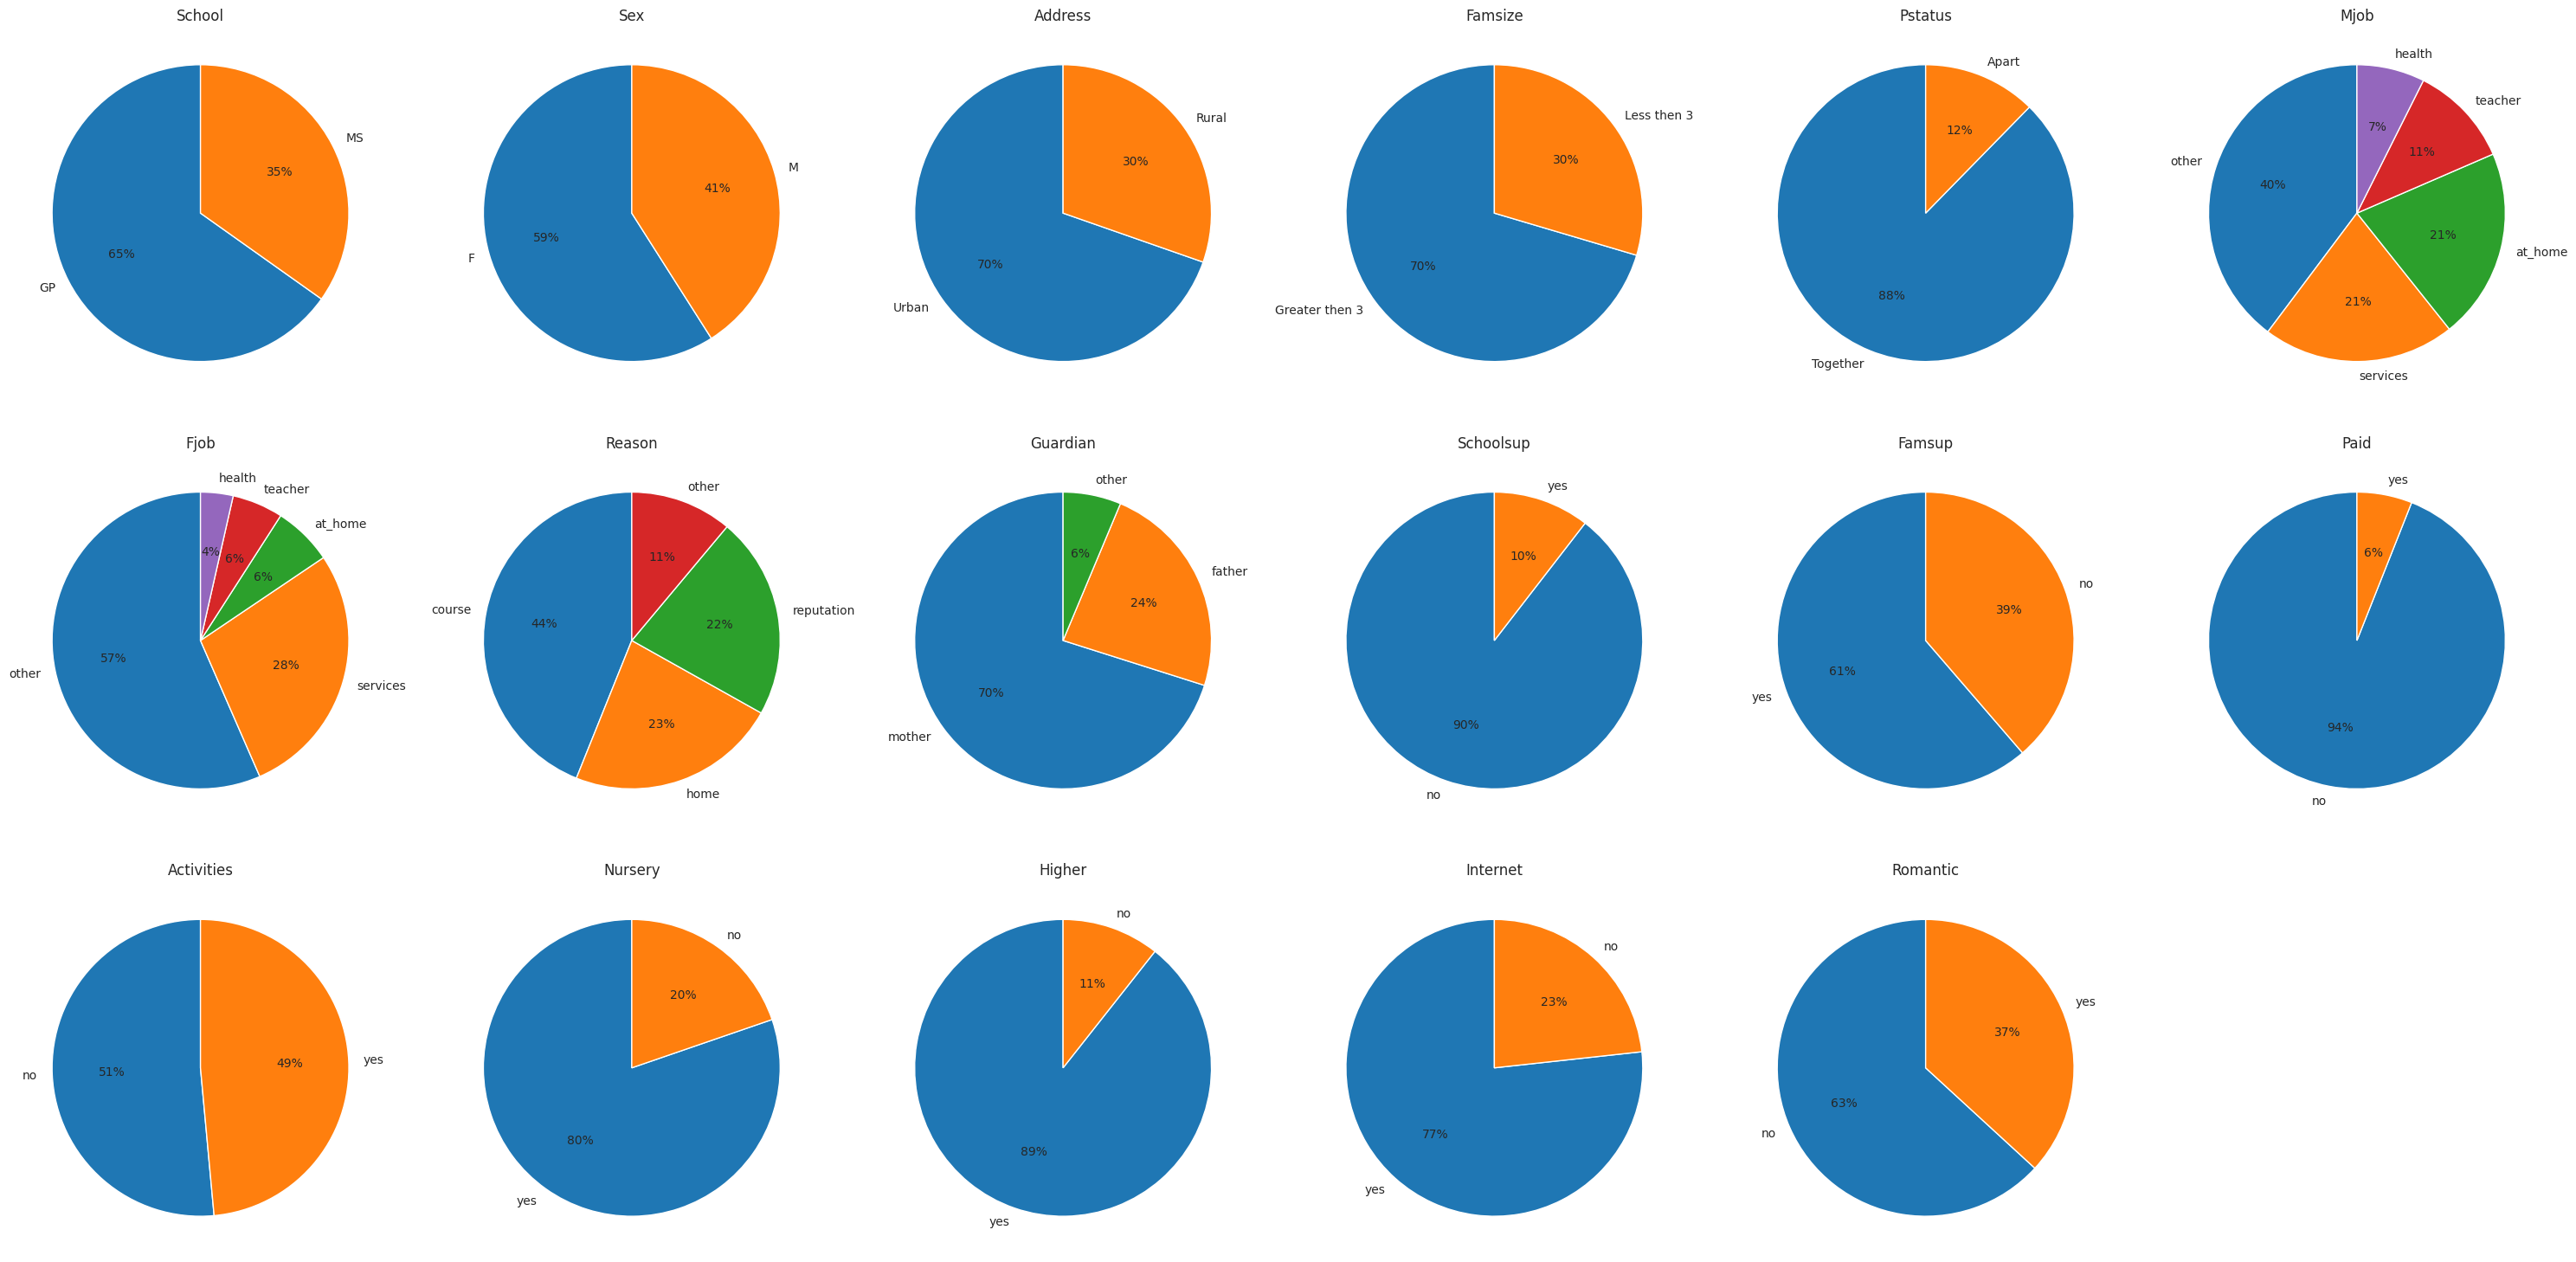

In [5]:
# features to be plotted
features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# create the subplots with a 3x6 grid
fig, axes = plt.subplots(3, 6, figsize=(30, 15))

# flatten the 3x6 grid of axes to a 1D array
axes = axes.flatten()

# loop through each feature and its corresponding axis
for ax, feature in zip(axes, features):
    counts = df[feature].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%.0f%%', startangle=90)
    ax.set_title(feature.capitalize())

# hide any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

Given the plots, let's comment on some of them:

Most students live in urban areas compared to rural ones. This could reflect differences in educational opportunities and available resources between urban and rural settings.

An important aspect is also the size of the students' families. Most come from families with more than three members, which can influence the available family support and the home environment in which the students grow up.

Regarding the parent's cohabitation status, the majority have parents who live together. This can indicate a more stable family environment, which could positively impact the students' well-being.

Another significant observation is the main reason for choosing the school, which is the course offered. This suggests that the quality of education provided is a main factor in the choice of school by students and their families.

Moreover, regarding extracurricular activities, students are evenly divided between those who participate and those who do not. This can reflect variations in students' personal preferences or the opportunities offered by the school.

Finally, it is relevant to note that the vast majority of students have access to the Internet, indicating good availability of digital resources for learning.

---

Let's now observe the distribution of the three grades and the correlation between them.

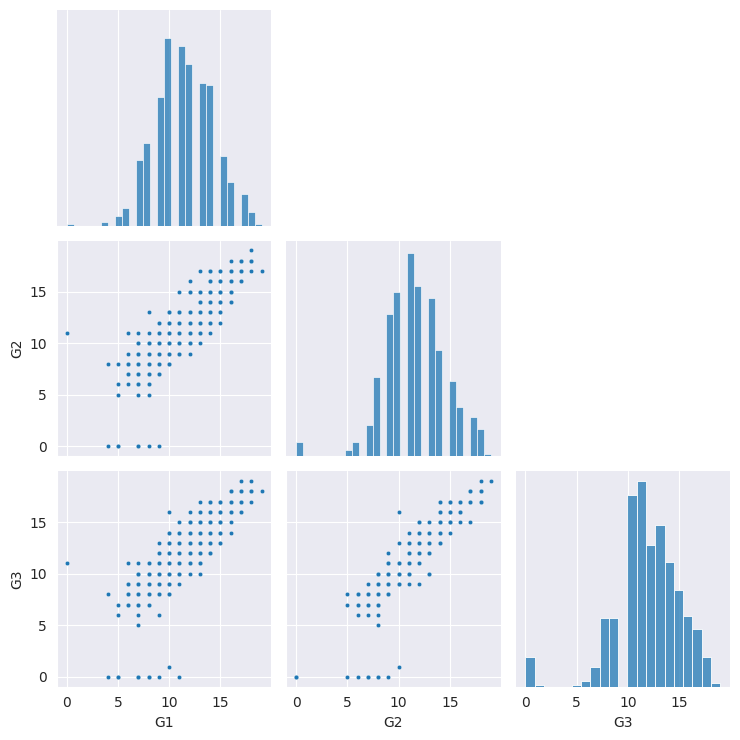

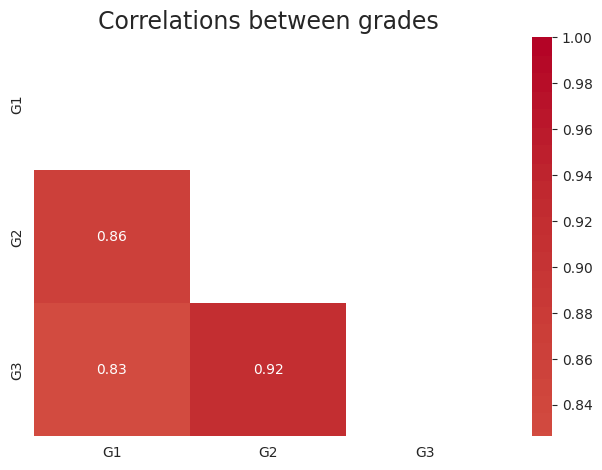

In [6]:
# plot
sns.pairplot(df[['G1','G2','G3']],
             corner=True,
             diag_kws={'fill': True},
             plot_kws={'s': 10})

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

# correlation matrix
corr_matrix = (df[['G1', 'G2', 'G3']].corr())

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)
with sns.axes_style("white"):
    hm = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, annot=True, fmt='.2f')
    hm.axes.set_title("Correlations between grades",fontsize=17)

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

As expected, there is a strong positive correlation between the grades. However, the aim of this work is to predict the final grade G3 using information about the students' social and personal situation, without considering the other grades. For this reason, we will proceed to remove G1 and G2 from the dataset.

In [7]:
df = df.drop(['G1', 'G2'], axis=1)

Let's now focus on G3.

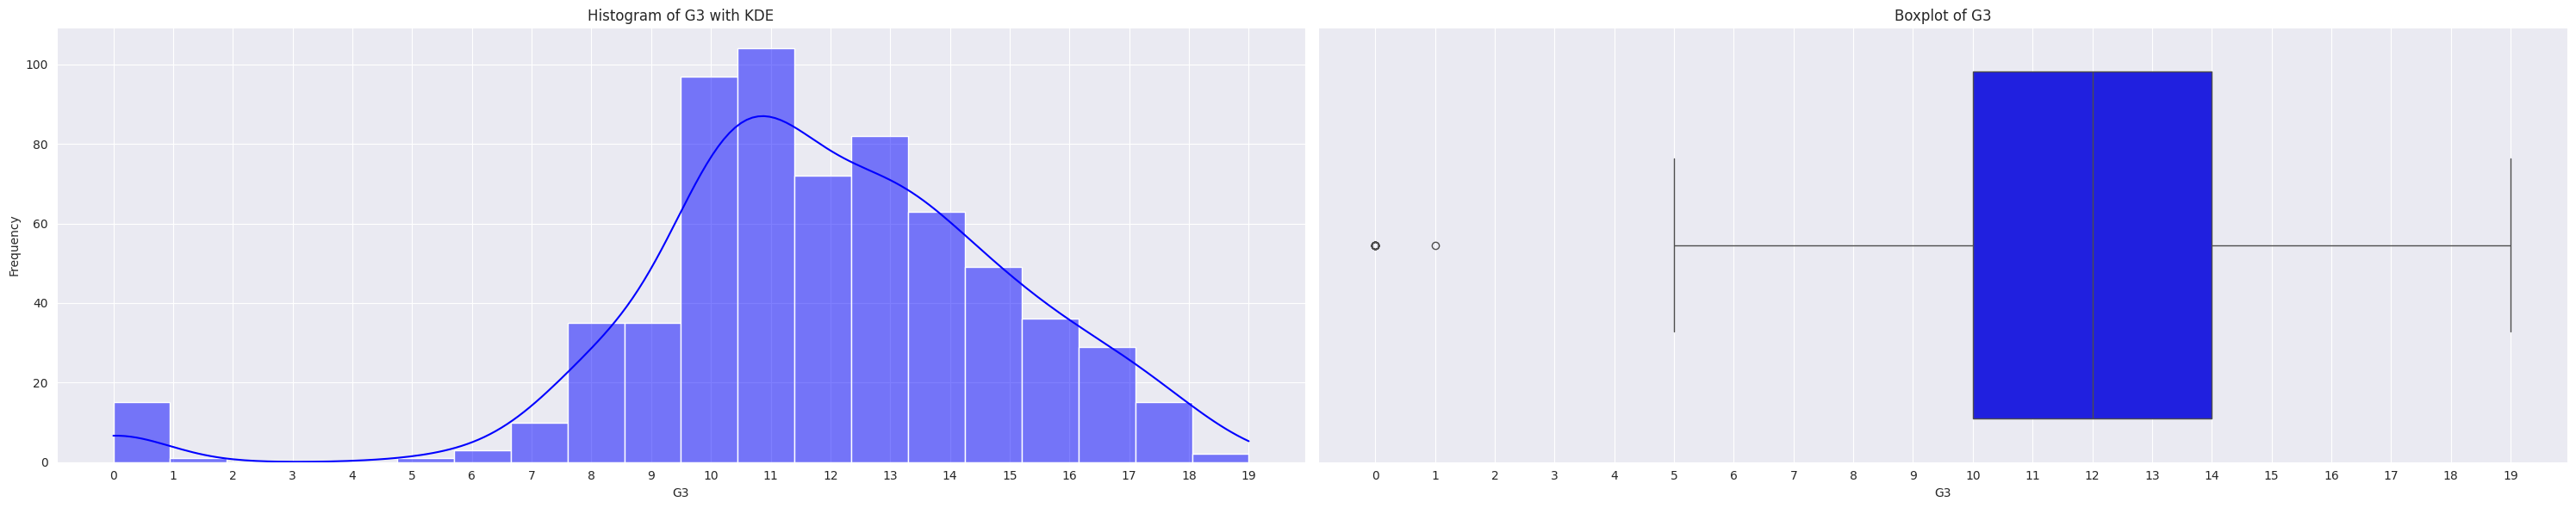

In [8]:
# create a figure with two subplots
plt.figure(figsize=(30, 6))

# histogram for column G3 with KDE line
plt.subplot(1, 2, 1)
sns.histplot(df['G3'], kde=True, bins=20, color='blue')
plt.title('Histogram of G3 with KDE')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.xticks(range(int(df['G3'].min()), int(df['G3'].max()) + 1, 1))

# boxplot for column G3
plt.subplot(1, 2, 2)
sns.boxplot(x=df['G3'], color='blue')
plt.title('Boxplot of G3')
plt.xlabel('G3')
plt.xticks(range(int(df['G3'].min()), int(df['G3'].max()) + 1, 1))

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

From the plot we can notice a considerable presence of "0" in G3. Let's examine these data more closely to understand if they result from any error. We will proceed to print the rows of the dataset with G3 = 0 and visualize all the variables.

In [9]:
g3_zero = df[df['G3']==0]
g3_zero

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
163,GP,M,18,Urban,Less then 3,Together,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,0
440,MS,M,16,Urban,Greater then 3,Together,1,1,at_home,services,home,mother,2,2,0,no,yes,no,yes,yes,yes,no,yes,5,4,5,4,5,3,0,0
519,MS,M,16,Rural,Greater then 3,Together,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5,2,1,1,1,2,0,0
563,MS,M,17,Urban,Greater then 3,Together,2,2,other,other,course,mother,1,1,1,no,no,no,yes,yes,yes,no,yes,1,2,1,2,3,5,0,0
567,MS,M,18,Rural,Greater then 3,Together,3,2,services,other,course,mother,1,1,1,no,no,no,no,yes,no,yes,no,2,3,1,2,2,5,0,0
583,MS,F,18,Rural,Greater then 3,Together,2,2,other,other,other,mother,2,1,1,no,no,no,no,yes,no,yes,yes,5,5,5,1,1,3,0,0
586,MS,F,17,Urban,Greater then 3,Together,4,2,teacher,services,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,5,5,1,3,5,0,0
597,MS,F,18,Rural,Greater then 3,Together,2,2,at_home,other,course,mother,3,2,1,no,no,no,yes,yes,yes,no,yes,4,3,3,1,1,4,0,0
603,MS,F,18,Rural,Less then 3,Apart,4,2,teacher,other,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,3,1,1,1,5,0,0
605,MS,F,19,Urban,Greater then 3,Together,1,1,at_home,services,other,father,2,1,1,no,no,no,no,yes,no,no,no,5,5,5,2,3,2,0,0


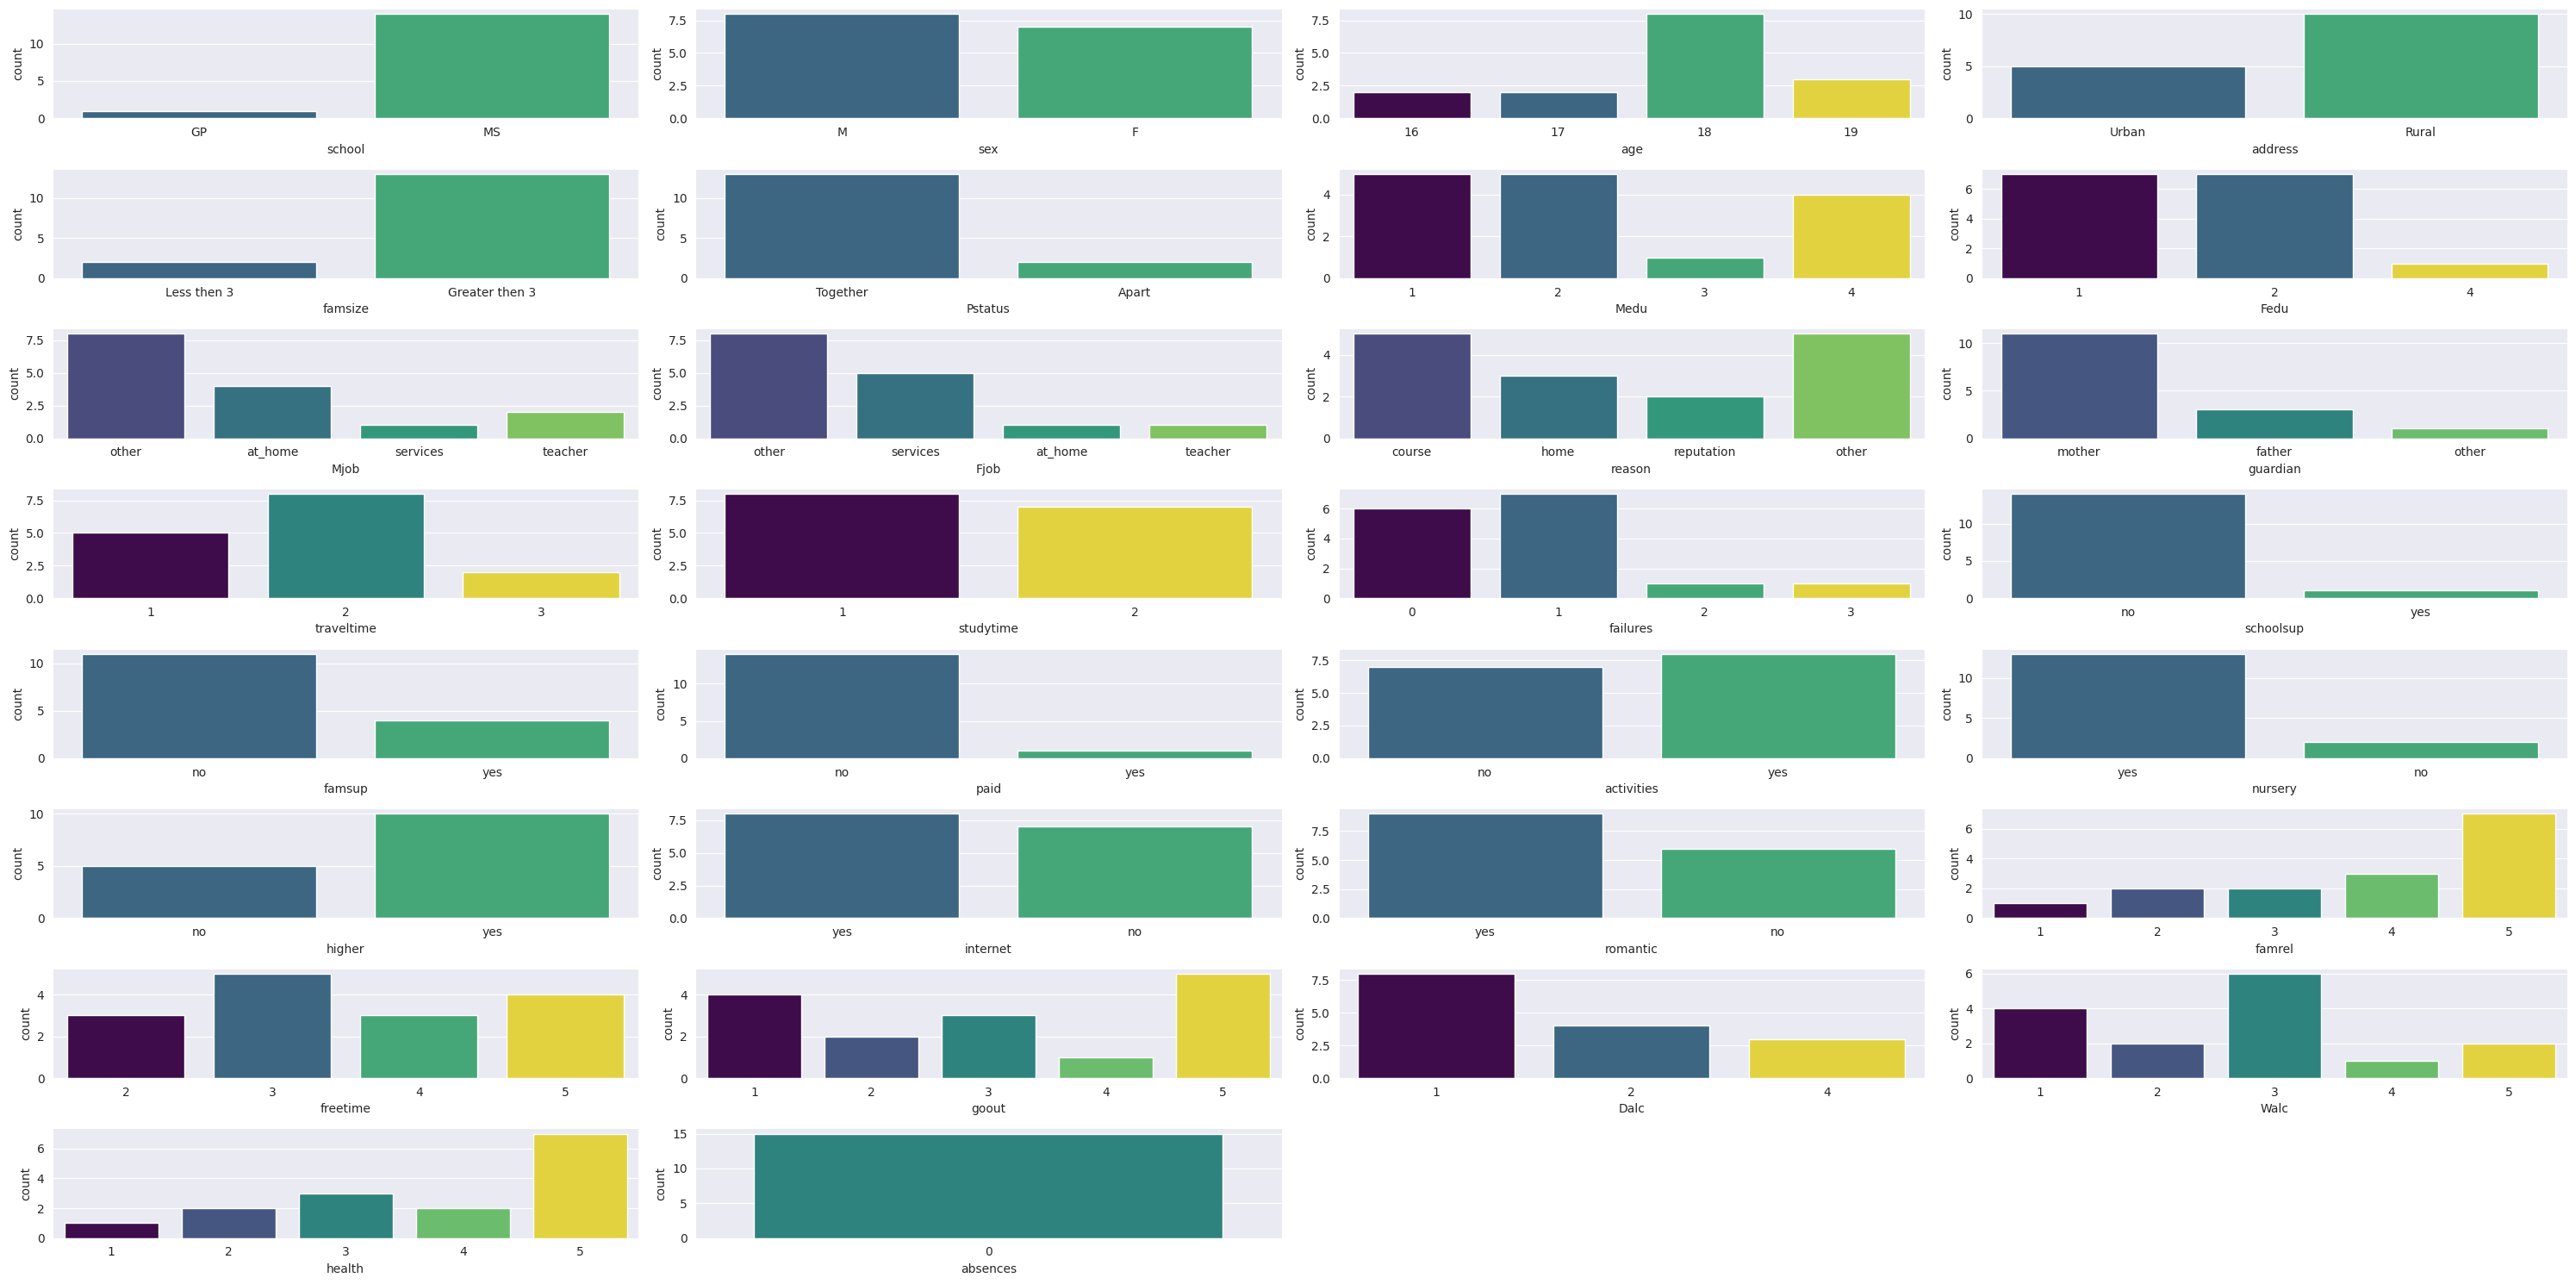

In [10]:
# set the figure size
plt.figure(figsize=(30, 15))

# select all columns except "G3"
cols = [col for col in g3_zero.columns if col != "G3"]

# loop through each column and create a subplot
for i, col in enumerate(cols, start=1):
    plt.subplot(8, 4, i)
    sns.countplot(data=g3_zero, x=col, hue=col, palette="viridis", legend=False)

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

All cases record zero absences and dedicate little time to studying. Moreover, almost no one pays for extra lessons and almost no one receives extracurricular support. These factors lead to think that the students didn't actually receive zero, but rather withdrew before the end of the year or didn't pass previous exams. Let's proceed to remove these data from the dataset.

In [11]:
# keep only the grades greater than 0
df = df[df["G3"] > 0]

We still need to investigate an outlier for G3 = 1.

In [12]:
df[df["G3"] == 1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
172,GP,M,16,Urban,Greater then 3,Together,3,3,other,services,course,father,1,2,1,no,yes,no,no,yes,yes,yes,yes,4,5,5,4,4,5,0,1


Observing the values of this student, we can assume that the grade is reasonable.

---

Now let's see how alcohol consumption during the weekend and weekdays affects students' academic performance.

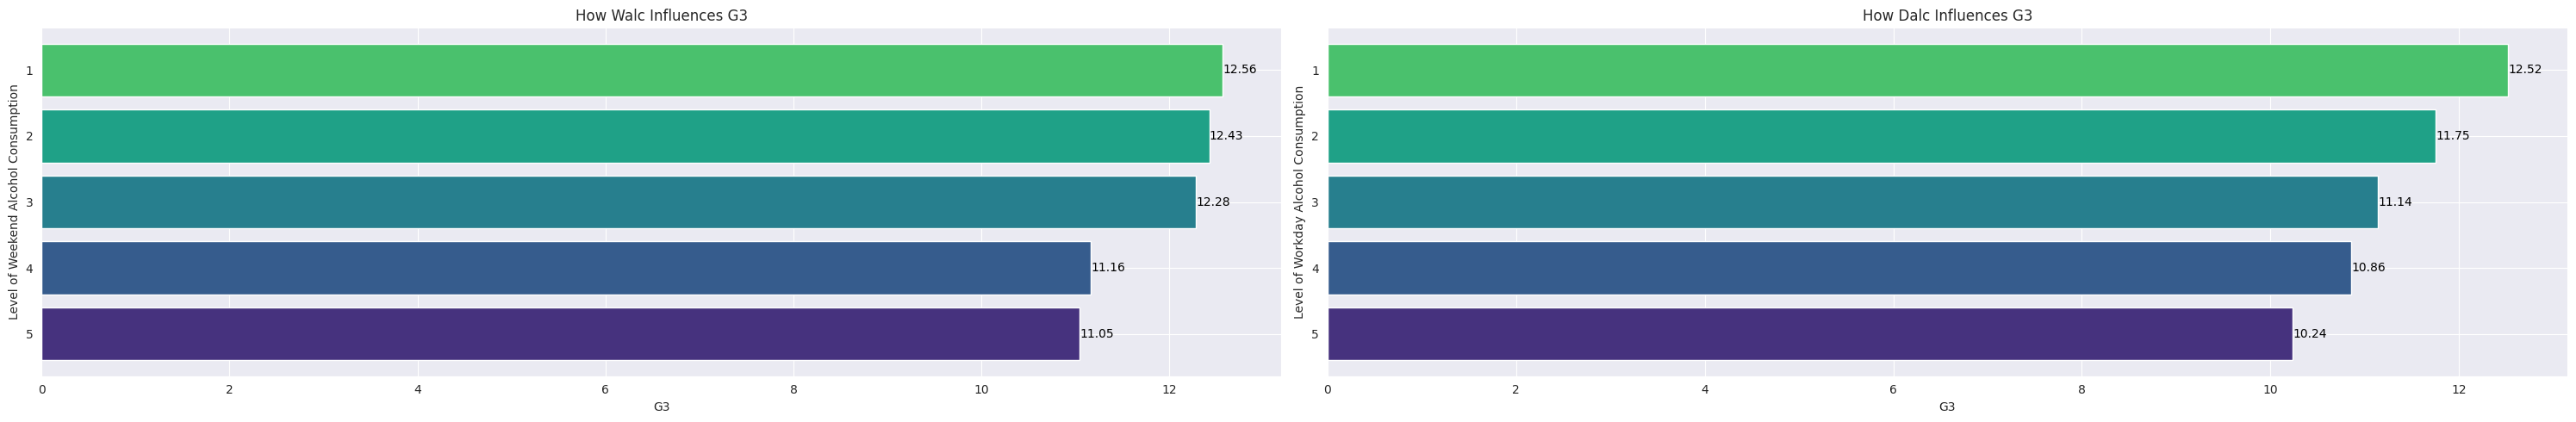

In [13]:
# features to be plotted
features = ['Walc', 'Dalc']

# create the subplots with a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(30, 5))

# set palette
color = sns.color_palette('viridis')

# loop through each feature and its corresponding axis
for ax, feature in zip(axes, features):
    # calculate the mean of 'G3' grouped by the current feature
    df_feature = df.groupby([feature])['G3'].mean().reset_index()
    # sort by 'G3' in ascending order
    df_feature = df_feature.sort_values(by='G3')

    # plot horizontal bar chart
    bars = ax.barh(df_feature[feature].astype(str), df_feature['G3'], color=color)
    ax.set_title(f'How {feature} Influences G3')
    ax.set_xlabel('G3')
    ax.set_ylabel('Level of ' + ('Weekend' if feature == 'Walc' else 'Workday') + ' Alcohol Consumption')

    # print the values on the bars
    for bar, value in zip(bars, df_feature['G3']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}',
                va='center', ha='left', fontsize=10, color='black')

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

For both weekly alcohol consumption (Walc) and daily alcohol consumption (Dalc), the more frequent the consumption, the lower the final grades. Those who drink less achieve higher scores.

So it's clear that reducing alcohol consumption could help students improve their academic performance.

---

Let's now observe how parents' occupation and level of education influence their children's academic performance.

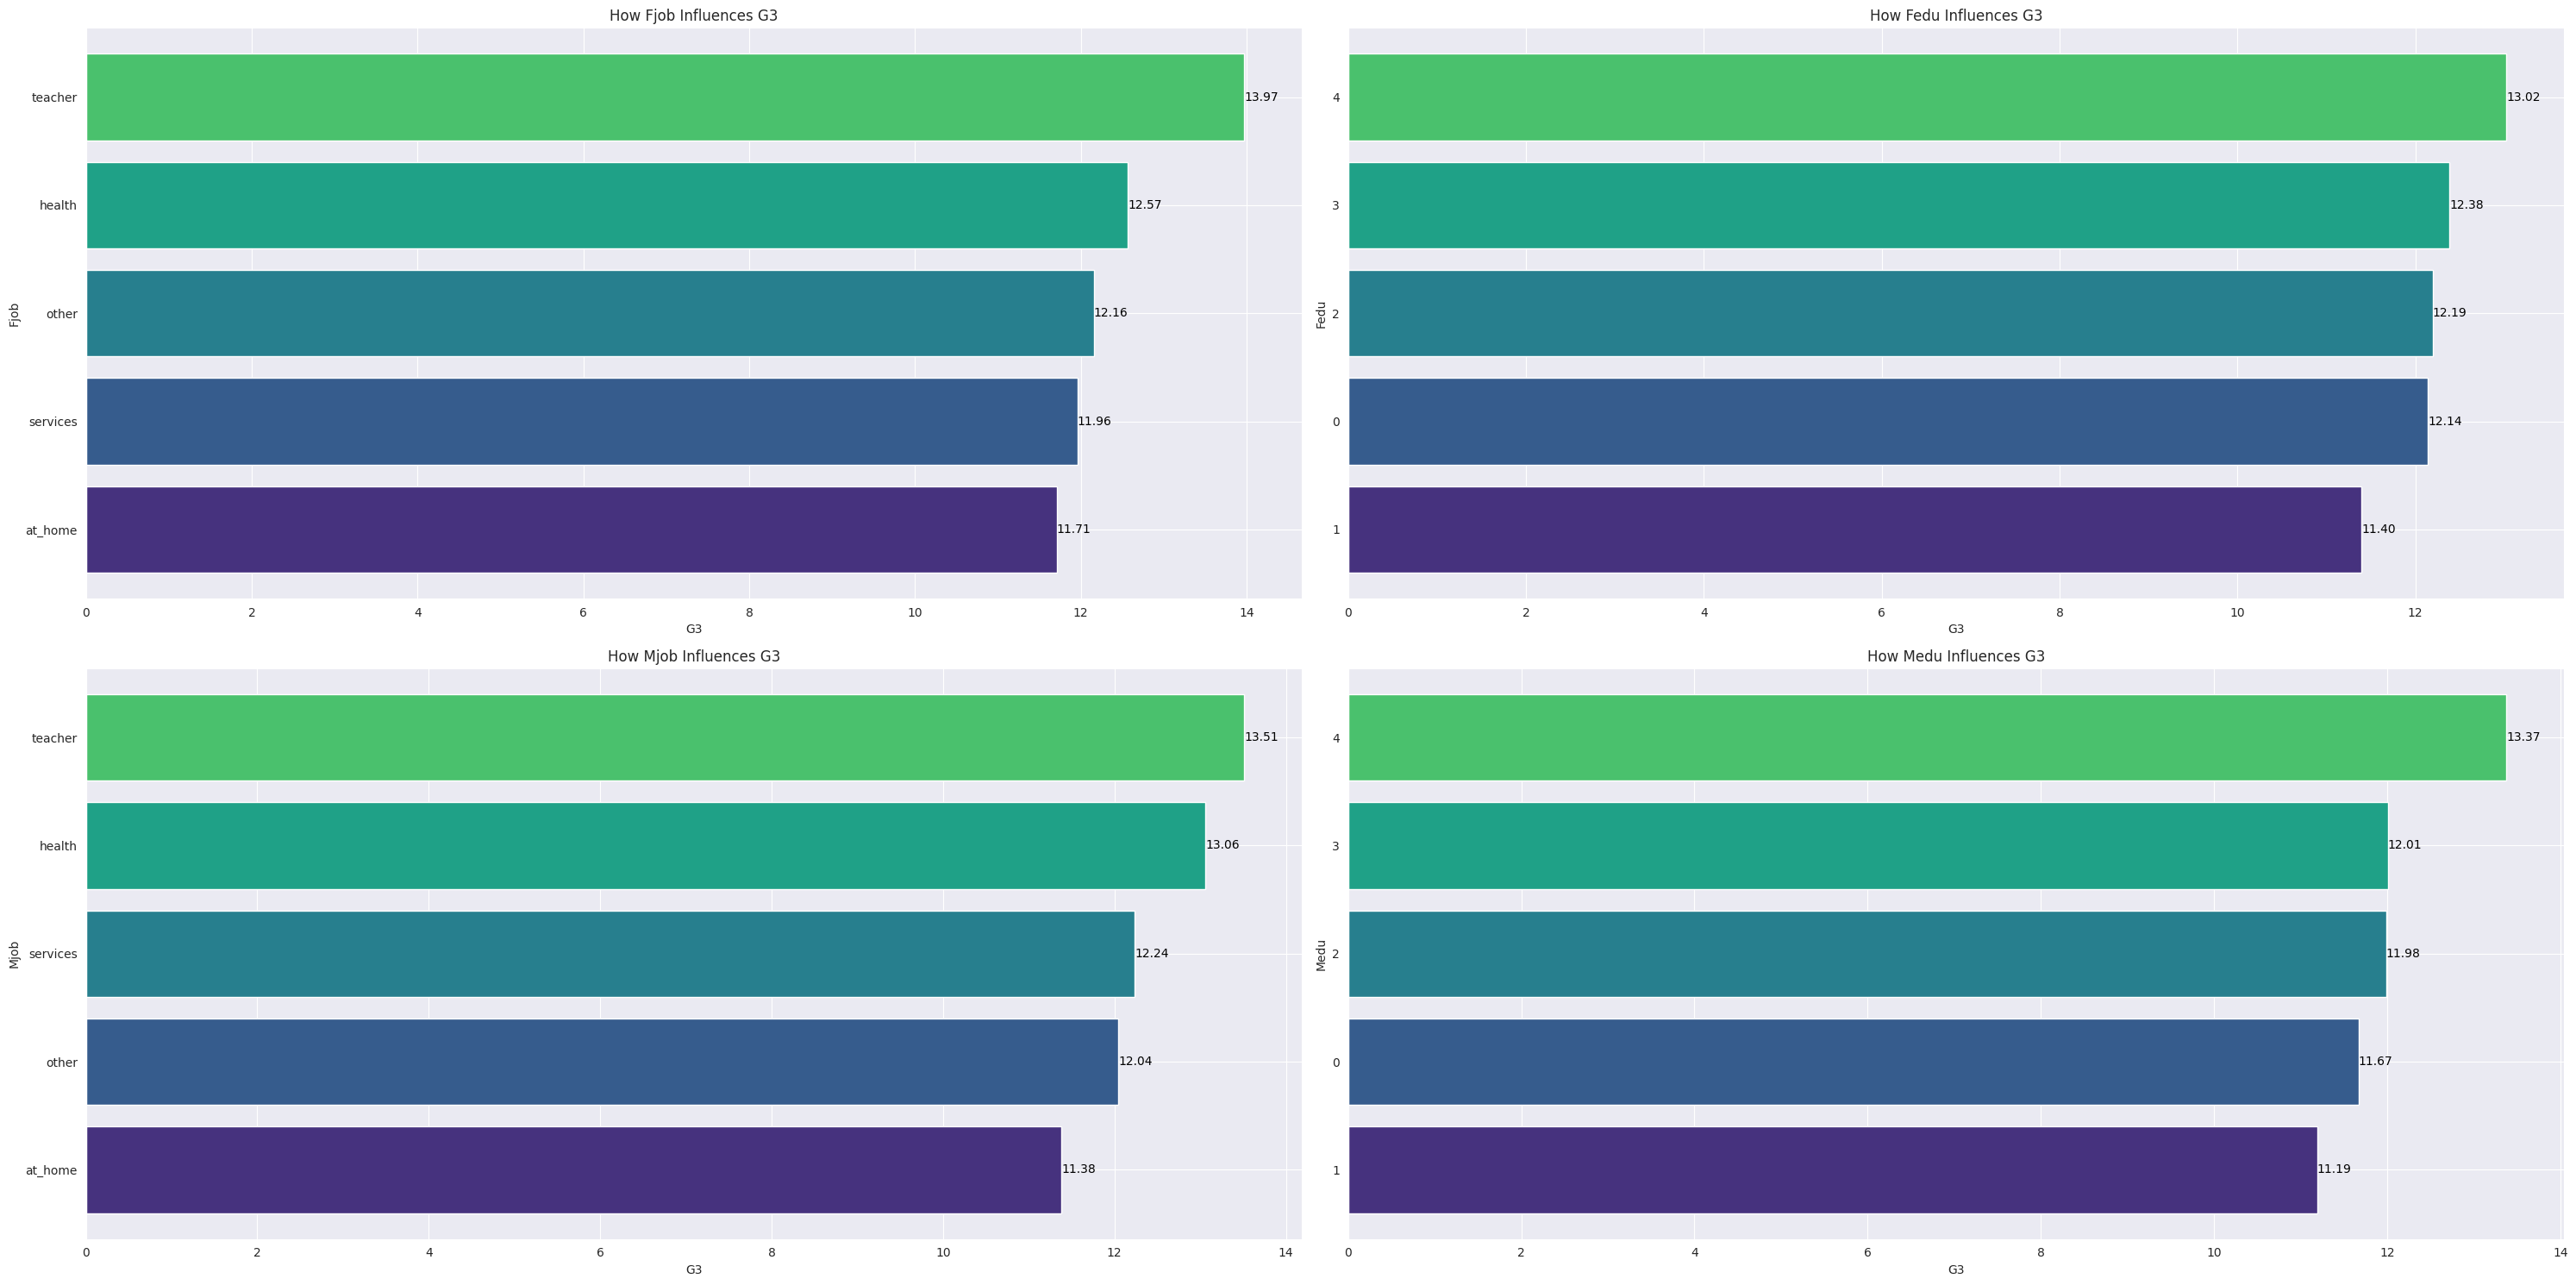

In [14]:
# features to be plotted
features = ['Fjob', 'Fedu', 'Mjob', 'Medu']

# create subplots with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

# flatten the 2x2 grid of axes into a 1D array
axes = axes.flatten()

# loop through each feature and its corresponding axis
for ax, feature in zip(axes, features):
    # calculate the mean of 'G3' grouped by the current feature
    df_feature = df.groupby([feature])['G3'].mean().reset_index()
    # sort by 'G3' in ascending order
    df_feature = df_feature.sort_values(by='G3')
    
    # plot horizontal bar chart
    bars = ax.barh(range(len(df_feature)), df_feature['G3'], color=color)
    ax.set_yticks(range(len(df_feature)))
    ax.set_yticklabels(df_feature[feature])
    ax.set_title(f'How {feature.capitalize()} Influences G3')
    ax.set_ylabel(feature.capitalize())
    ax.set_xlabel('G3')

    # print the values on the bars
    for bar, value in zip(bars, df_feature['G3']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
                va='center', ha='left', fontsize=10, color='black')

# adjust layout to prevent overlapping
plt.tight_layout()

# show the plot
plt.show()

The data regarding the occupation of both mothers and fathers show that children of teachers and those in the healthcare sector tend to have higher academic results, while children of parents in "homemaker" or "other" occupations tend to have lower academic outcomes.

Regarding parental education, children of parents with higher education (secondary school and university education) generally achieve higher scores, while children of parents with primary education or no education achieve lower scores.

These findings indicate that the socio-economic background and education of parents play a crucial role in determining the academic success of their children.

---
Now let's see the G3 score for father's and mother's education levels using a heatmap, thus we expect a positive correlation.

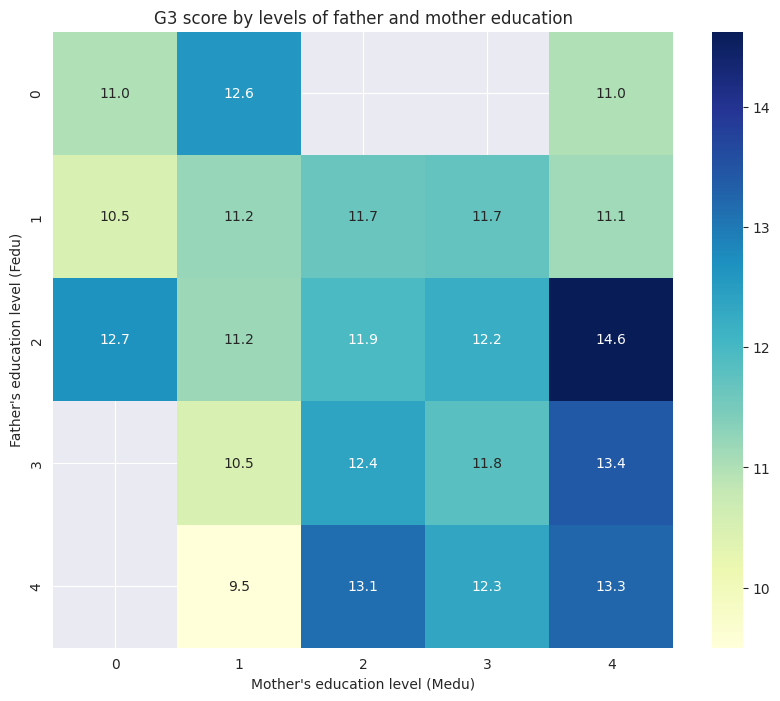

In [15]:
# calculate the mean G3 score grouped by 'Fedu' (father's education) and 'Medu' (mother's education)
edu_corr = df.groupby(['Fedu', 'Medu'])['G3'].mean().unstack()

# create a figure with specified size
plt.figure(figsize=(10, 8))

# create a heatmap to visualize the education correlation
sns.heatmap(edu_corr, annot=True, cmap='YlGnBu', fmt='.1f', cbar=True)

# set the title and axis labels
plt.title('G3 score by levels of father and mother education')
plt.xlabel('Mother\'s education level (Medu)')
plt.ylabel('Father\'s education level (Fedu)')

# display the plot
plt.show()

The heatmap shows that, generally, the G3 score of students tends to increase with both the father's (Fedu) and mother's (Medu) education levels. This suggests that a family environment with more educated parents could positively influence students' academic performance.

---

Let's observe how other features influence academic performance.

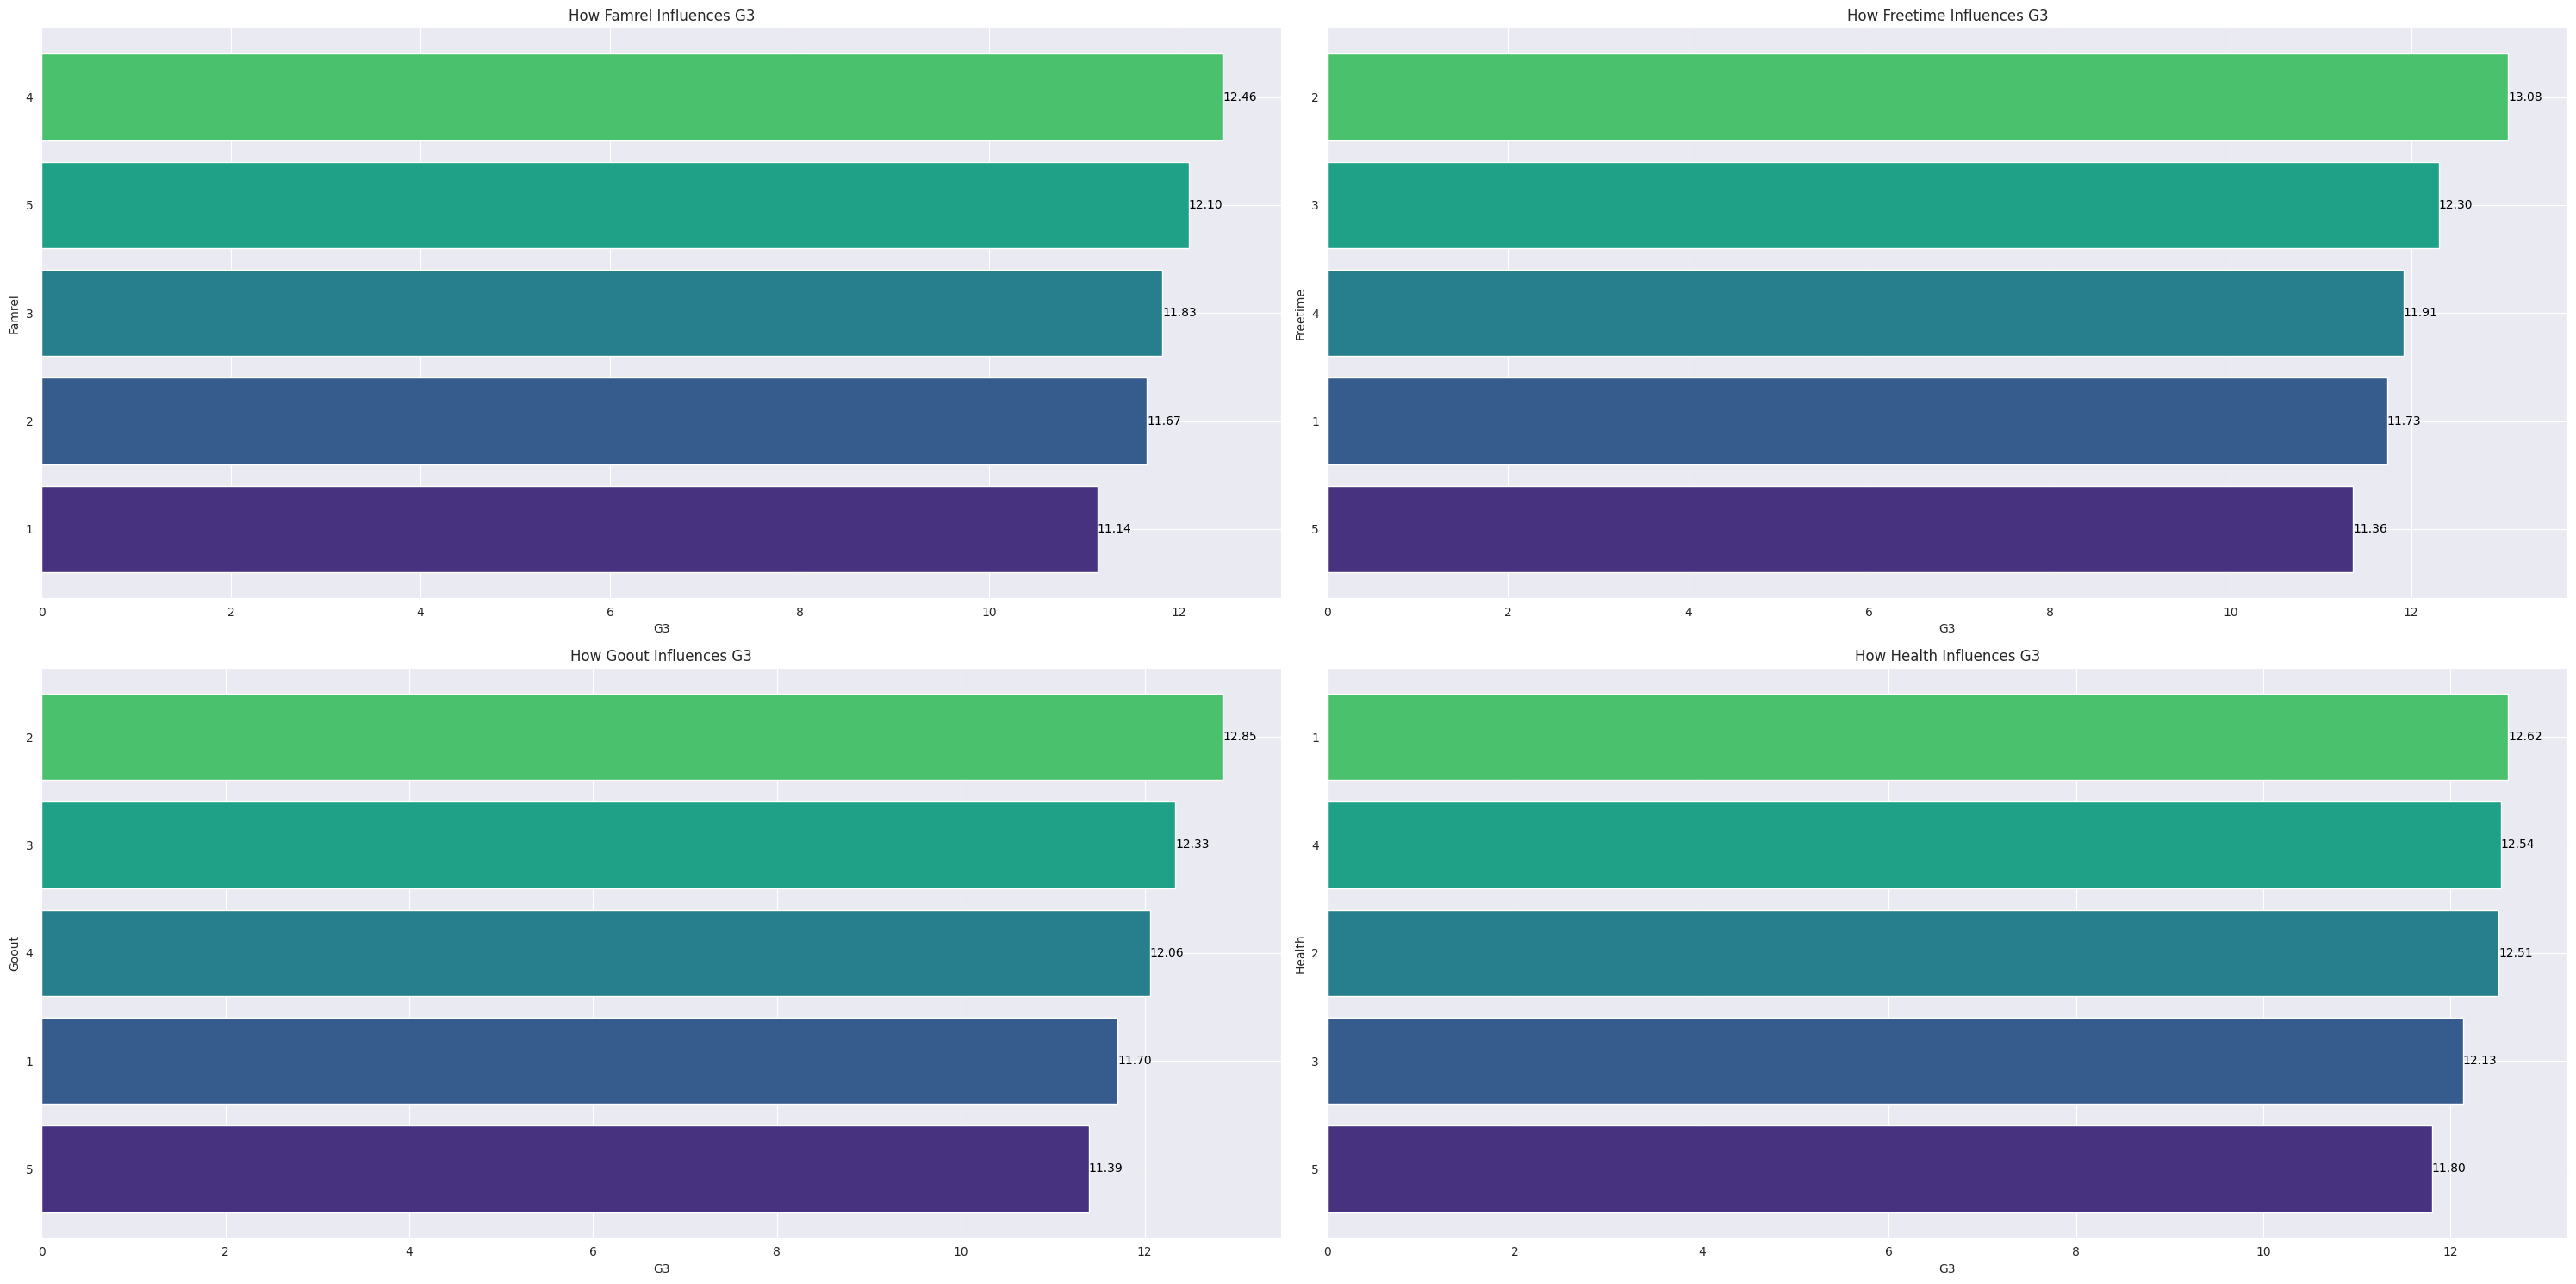

In [16]:
# features to be plotted
features = ['famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']

# create subplots with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

# flatten the 2x2 grid of axes into a 1D array
axes = axes.flatten()

# loop through each feature and its corresponding axis
for ax, feature in zip(axes, features):
    # calculate the mean of 'G3' grouped by the current feature
    df_feature = df.groupby([feature])['G3'].mean().reset_index()
    # sort by 'G3' in ascending order
    df_feature = df_feature.sort_values(by='G3')
    
    # plot horizontal bar chart
    bars = ax.barh(range(len(df_feature)), df_feature['G3'], color=color)
    ax.set_yticks(range(len(df_feature)))
    ax.set_yticklabels(df_feature[feature])
    ax.set_title(f'How {feature.capitalize()} Influences G3')
    ax.set_ylabel(feature.capitalize())
    ax.set_xlabel('G3')

    # print the values on the bars
    for bar, value in zip(bars, df_feature['G3']):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
                va='center', ha='left', fontsize=10, color='black')
        
# adjust layout to prevent overlapping
plt.tight_layout()

# show the plot
plt.show()

The quality of family relationships plays a significant role in students' academic performance. Students who rate their family relationships as good to very good tend to have higher academic scores, while those with poorer family relationships achieve lower scores.

Regarding free time, students with low amounts of free time after school achieve the highest academic performance, whereas those with very high free time have the lowest scores.

The frequency of going out with friends also impacts academic performance. Students who go out less frequently tend to perform better academically compared to those who go out more often.

Students with poorer health tend to have higher academic performance, while those with very good health tend to have lower scores.

---

To conclude the EDA, let's look at the remaining features.

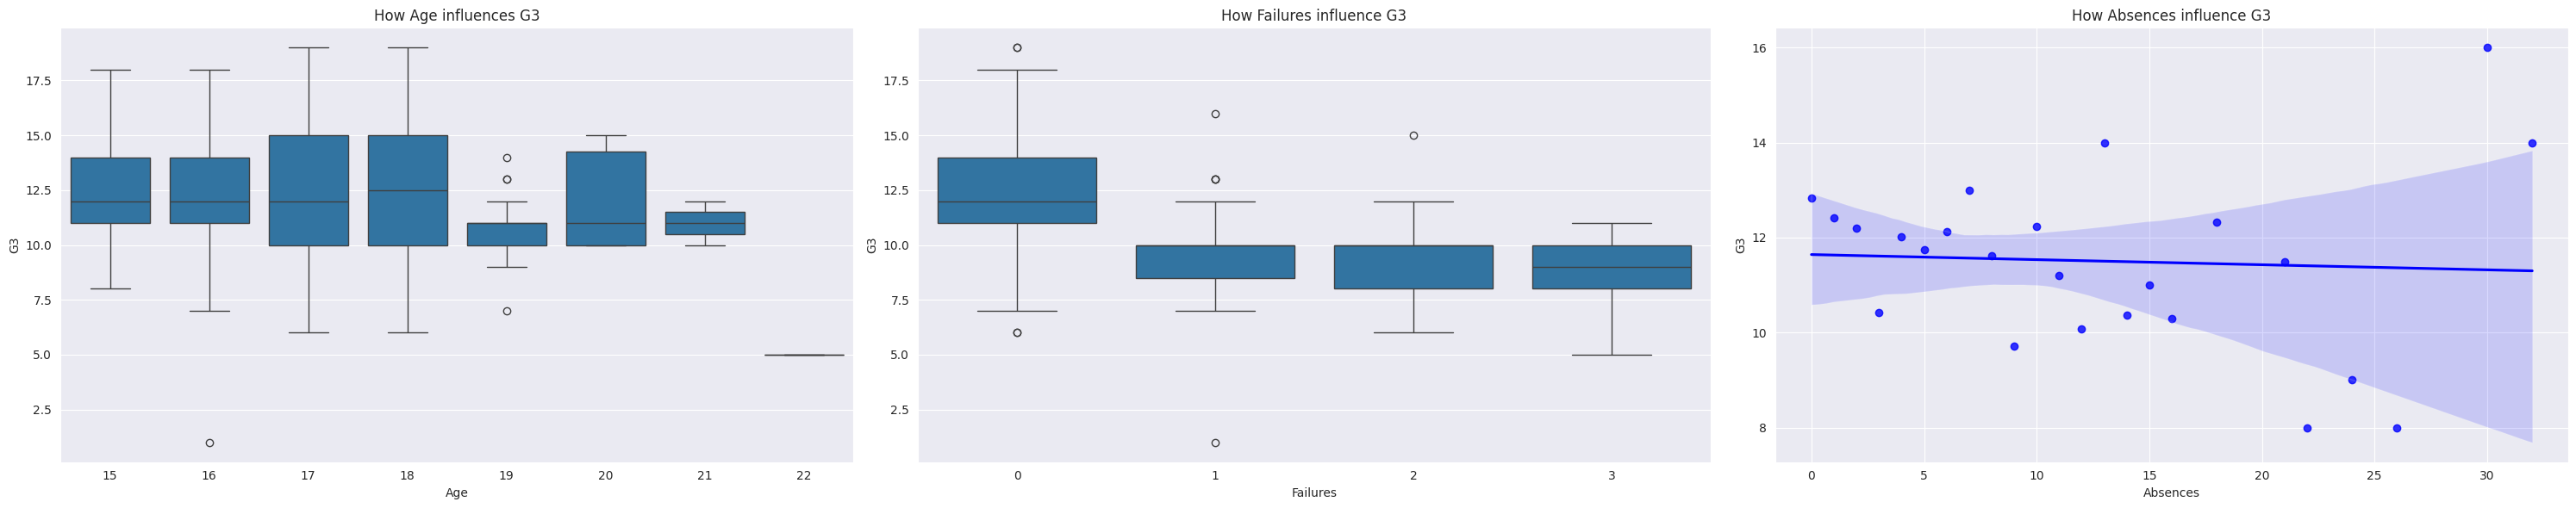

In [17]:
# create the plots
plt.figure(figsize=(30, 6))

# plot 1: Box plot for 'age' vs G3
plt.subplot(1, 3, 1)
sns.boxplot(x='age', y='G3', data=df)
plt.title('How Age influences G3')
plt.xlabel('Age')
plt.ylabel('G3')

# plot 2: Box plot for 'failures' vs G3
plt.subplot(1, 3, 2)
sns.boxplot(x='failures', y='G3', data=df)
plt.title('How Failures influence G3')
plt.xlabel('Failures')
plt.ylabel('G3')

# plot 3: Box plot for 'absences' vs G3
plt.subplot(1, 3, 3)
avg_g3_by_absences = df.groupby('absences')['G3'].mean()
sns.regplot(x=avg_g3_by_absences.index, y=avg_g3_by_absences.values, color='blue')
plt.title('How Absences influence G3')
plt.xlabel('Absences')
plt.ylabel('G3')

# adjust layout to prevent overlapping
plt.tight_layout()

# Ddisplay the plot
plt.show()

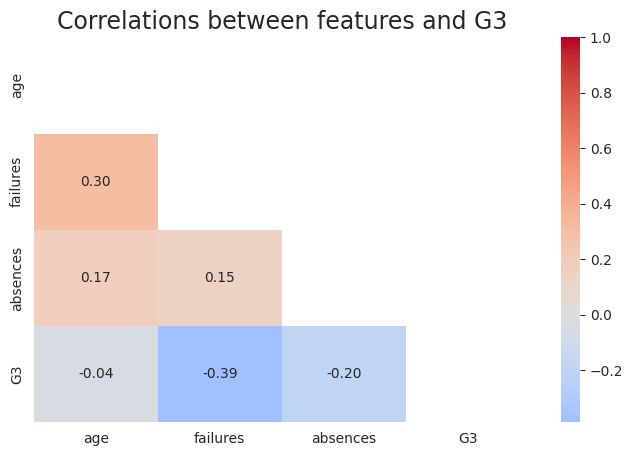

In [18]:
# select columns of interest
corr_columns = df[['age', 'failures', 'absences', 'G3']]

# calculate the correlation matrix
corr_matrix = corr_columns.corr()

# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# heatmap
with sns.axes_style("white"):
    plt.figure(figsize=(8,5))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    hm = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, annot=True, fmt='.2f')
    hm.axes.set_title("Correlations between features and G3",fontsize=17)
    
plt.show()

From the plots we can notice that:

- G3 between 15 and 18 years old is not influenced by age, although a wider distribution is noticeable
- G3 decreases with an increase in the number of failures
- There is no clear relationship between absences and G3

Furthermore, we see that there is no significant correlation between the features and G3.

---

Let's see if there are any other correlations between the variables using a correlation matrix.

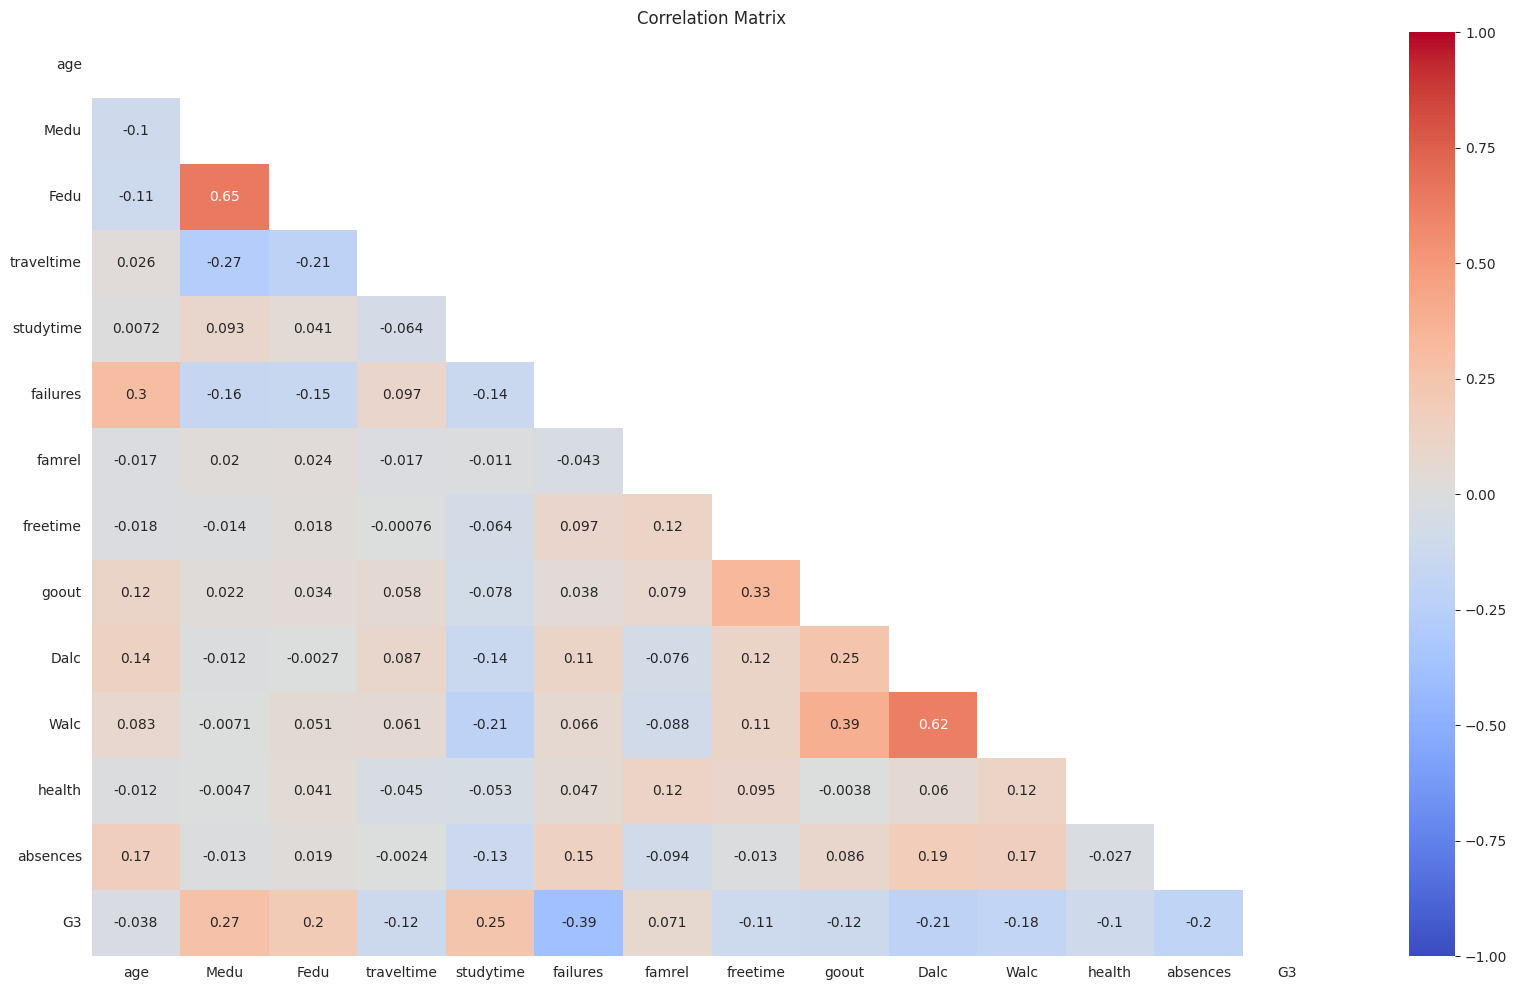

In [19]:
# exclude non-numeric columns from the correlation matrix
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# calculate the correlation matrix
corr_matrix = df_numeric.corr()

# create a mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# create a heatmap
with sns.axes_style("white"):
    plt.figure(figsize=(20, 12))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')

# display the plot
plt.show()

We can notice that there are significant correlations between:

- Mother's and father's education, showing a strong positive correlation
- Study time and academic success, with a positive correlation
- Alcohol consumption during the week and on weekends with a strong positive correlation and both negative with G3

# MACHINE LEARNING

### Preprocessing

To be ready for machine learning, we proceed to recode the binary variables with 0s and 1s.

In [20]:
changes = ['sex', 'address', 'famsize', 'Pstatus',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']

changes_2 = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'famrel', 'freetime', 'goout',
            'Dalc', 'Walc', 'health', 'absences','failures']

df = pd.get_dummies(df, columns=changes, drop_first=True)
df = pd.get_dummies(df, columns=changes_2, drop_first=False)

Now the DataFrame looks like:

In [21]:
df.head()

,school,age,G3,sex_M,address_Urban,famsize_Less then 3,Pstatus_Together,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,traveltime_1,traveltime_2,traveltime_3,traveltime_4,studytime_1,studytime_2,studytime_3,studytime_4,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,absences_0,absences_1,absences_2,absences_3,absences_4,absences_5,absences_6,absences_7,absences_8,absences_9,absences_10,absences_11,absences_12,absences_13,absences_14,absences_15,absences_16,absences_18,absences_21,absences_22,absences_24,absences_26,absences_30,absences_32,failures_0,failures_1,failures_2,failures_3
0,GP,18,11,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,GP,17,11,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,GP,15,12,False,True,True,True,True,False,False,False,True,True,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,GP,15,14,False,True,False,True,False,True,False,True,True,True,True,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,GP,16,13,False,True,False,True,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False

We prepare the data by separating it into features and target, and then into training (30%) and test (70%) sets. For this, we will use one-hot encoding.

In [22]:
# data preparation
X = pd.get_dummies(df.drop(['G3'], axis=1)).values  # features
y = df['G3'].values  # target

# splitting the data into training and test sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

### Cross Validation

We will use RandomSearchCV to find the best parameter values compared to GridSearchCV because:
- **Computational efficiency**: by trying fewer parameter value combinations, it reduces computational time
- **Flexibility**: it can find better values by exploring a wider range of parameters

We also define three scores to evaluate models' performance:
- **R² (Coefficient of determination)**:
  - **Description**: Measures how well the model explains the variability of the data around its mean
  - **Values**: From 0 to 1 (closer to 1 is better, with 1 indicating a perfect explanation of the variability)

- **MAE (Mean Absolute Error)**:
  - **Description**: Average of the absolute differences between predicted and observed values
  - **Values**: From 0 to &#8734; (lower is better, indicating smaller errors between predictions and observations)

- **MSE (Mean Squared Error)**:
  - **Description**: Average of the squared differences between predicted and observed values
  - **Values**: From 0 to &#8734; (lower is better, penalizing larger errors more than MAE)

These scores will help assess the efficiency of the models.

In [23]:
# define scorers
scorers = {
    "r2": make_scorer(r2),
    "mae": make_scorer(mae),
    "mse": make_scorer(mse)
}

# list to store models
models = []

### Random Forest

Let's proceed with the first model. We will test the following parameters:

- **n_estimators**: The number of trees in the forest (an efficiency parameter)
- **max_depth**: The maximum depth of each decision tree in the forest
- **max_features**: The maximum number of features to consider for splitting each node
- **min_samples_split**: The minimum number of samples required to split an internal node

In [24]:
# random forest
rf = RF(random_state=SEED)

# random forest parameters
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': list(range(1, 25)),
    'max_features': np.arange(1, X_train.shape[1] + 1),
    'min_samples_split': np.arange(2, 11)
}

# randomized search with cross-validation
rf_rscv = RSCV(estimator=rf,
                 param_distributions=rf_params,
                 n_iter=200,
                 cv=10,
                 scoring=scorers,
                 refit='r2',
                 n_jobs=-1,
                 random_state=SEED)

# fit randomized search
rf_rscv.fit(X_train, y_train)

# print best parameters score found during validation
print("Best parameters:", rf_rscv.best_params_)

# append the best estimator to the models list
models.append(rf_rscv.best_estimator_)

Best parameters: {'n_estimators': 50, 'min_samples_split': np.int64(9), 'max_features': np.int64(81), 'max_depth': 16}


### Decision Tree

Regarding Decision Tree, the following parameters will be tested:

- **max_depth**: The maximum depth of each decision tree
- **min_samples_split**: The minimum number of samples required to split an internal node
- **min_samples_leaf**: The minimum number of samples required to be in a leaf node

In [25]:
# decision tree
dt = DT(random_state=SEED)

# decision tree parameters
dt_params = {
    'max_depth': list(range(1, 25)),
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

# randomized search with cross-validation
dt_rscv = RSCV(estimator=dt,
                 param_distributions=dt_params,
                 n_iter=200,
                 cv=10,
                 scoring=scorers,
                 refit='r2',
                 n_jobs=-1,
                 random_state=SEED)

# fit randomized search
dt_rscv.fit(X_train, y_train)

# print best parameters score found during validation
print("Best parameters:", dt_rscv.best_params_)

# append the best estimator to the models list
models.append(dt_rscv.best_estimator_)

Best parameters: {'min_samples_split': 50, 'min_samples_leaf': 2, 'max_depth': 4}


---
Since KNN and SVR require data scaling, we apply it before proceeding to train them.

In [26]:
# standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN

For KNN, the following parameters will be tested:

- **n_neighbors**: Number of neighbors to consider
- **algorithm**: Algorithm used to compute the nearest neighbors
- **weights**: Method used to weight the neighbors
- **metric**: Distance metric to use

In [27]:
# setting the random seed for reproducibility
np.random.seed(SEED)

# k-nearest neighbors
knn = KNN()

# k-nearest neighbors parameters
knn_params = {
    'n_neighbors': list(range(3, 50, 2)),
    'algorithm': ['ball_tree', 'kd_tree'],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']
}

# randomized search with cross-validation
knn_rscv = RSCV(estimator=knn,
                  param_distributions=knn_params,
                  n_iter=100,
                  cv=10,
                  scoring=scorers,
                  refit='r2',
                  n_jobs=-1,
                  random_state=SEED,
                  error_score='raise')

# fit randomized search
knn_rscv.fit(X_train, y_train)

# print best parameters score found during validation
print("Best parameters:", knn_rscv.best_params_)

# append the best estimator to the models list
models.append(knn_rscv.best_estimator_)


Best parameters: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean', 'algorithm': 'ball_tree'}


### SVR

For SVR, the following parameters will be tested:

Linear kernel:

- **C**: Regularization parameter
- **epsilon**: Epsilon parameter in the insensitive loss function

RBF kernel:

- **C**: Regularization parameter
- **gamma**: Kernel coefficient for rbf
- **epsilon**: Epsilon parameter in the insensitive loss function

Polynomial kernel:

- **C**: Regularization parameter
- **degree**: Degree of the polynomial kernel
- **epsilon**: Epsilon parameter in the insensitive loss function

In [28]:
# setting the random seed for reproducibility
np.random.seed(SEED)

# support vector regression
svr = SVR()

# support vector regression parameters
svr_params = [
    {"kernel": ["linear"], "C": np.logspace(-2, 2, 20), "epsilon": [0.0001, 0.001, 0.01, 0.1]},
    {"kernel": ["rbf"], "C": np.logspace(-2, 2, 20), "gamma": ['scale', 'auto'], "epsilon": [0.0001, 0.001, 0.01, 0.1]},
    {"kernel": ["poly"], "C": np.logspace(-2, 2, 20), "degree": np.arange(1, 5), "epsilon": [0.0001, 0.001, 0.01, 0.1]}
]

# randomized search with cross-validation
svr_rscv = RSCV(estimator=svr,
                  param_distributions=svr_params,
                  n_iter=200,
                  cv=10,
                  scoring=scorers,
                  refit='r2',
                  n_jobs=-1,
                  random_state=SEED)

# fit randomized search
svr_rscv.fit(X_train, y_train)

# print best parameters score found during validation
print("Best parameters:", svr_rscv.best_params_)

# append the best estimator to the models list
models.append(svr_rscv.best_estimator_)

Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.01, 'C': np.float64(14.38449888287663)}


### Models' Performance

Now let's compare the models' performance based on the three scores:

In [29]:
# evaluate models
results = []
for model in models:
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    r2_train = r2(y_train, train_pred)
    r2_test = r2(y_test, test_pred)
    
    mae_train = mae(y_train, train_pred)
    mae_test = mae(y_test, test_pred)
    
    mse_train = mse(y_train, train_pred)
    mse_test = mse(y_test, test_pred)
    
    results.append([type(model).__name__, r2_train, mae_train, mse_train, r2_test, mae_test, mse_test])

results_df = pd.DataFrame(results, columns=["Model", "R2 Train", "MAE Train", "MSE Train", "R2 Test", "MAE Test", "MSE Test"]).round(2)
results_df

,Model,R2 Train,MAE Train,MSE Train,R2 Test,MAE Test,MSE Test
0,RandomForestRegressor,0.77,1.01,1.62,0.33,1.76,4.97
1,DecisionTreeRegressor,0.35,1.73,4.67,0.18,1.95,6.10
2,KNeighborsRegressor,0.28,1.81,5.19,0.19,1.97,6.00
3,SVR,0.46,1.44,3.89,0.30,1.80,5.20


The **Random Forest** has the highest R2 Test among the models, indicating it can explain a good percentage of variance in the test data. However, there is a noticeable difference between R2 Train and R2 Test, suggesting there might be a slight overfitting issue.

The **K-Nearest Neighbors** shows the lowest R2 Test among the models, indicating it explains less variance in the test data compared to the others. Additionally, it has higher error scores (MAE and MSE) in both the training and test sets.

The **SupportVectorRegressor** shows a better R2 Test compared to the K-Nearest Neighbors but lower than the Random Forest. However, it has higher error scores (MAE and MSE) compared to the Random Forest, indicating more discrepancy between predictions and actual values.

The **Decision Tree** has a similar R2 Test to the K-Nearest Neighbors but with slightly better error scores (MAE and MSE). However, it shows a tendency to overfit, as indicated by the difference between R2 Train and R2 Test.

The Random Forest is the best model, with the highest R2 Test and the lowest error scores (MAE and MSE), indicating better predictive ability and generalization compared to the other models. The Support Vector Regressor (SVR) follows with a competitive R2 Test and lower error scores compared to other models, demonstrating good predictive capability.

### Best models: RF and SVR

Let's plot the real and the predictions values made by the two models in order to better understand how they work.

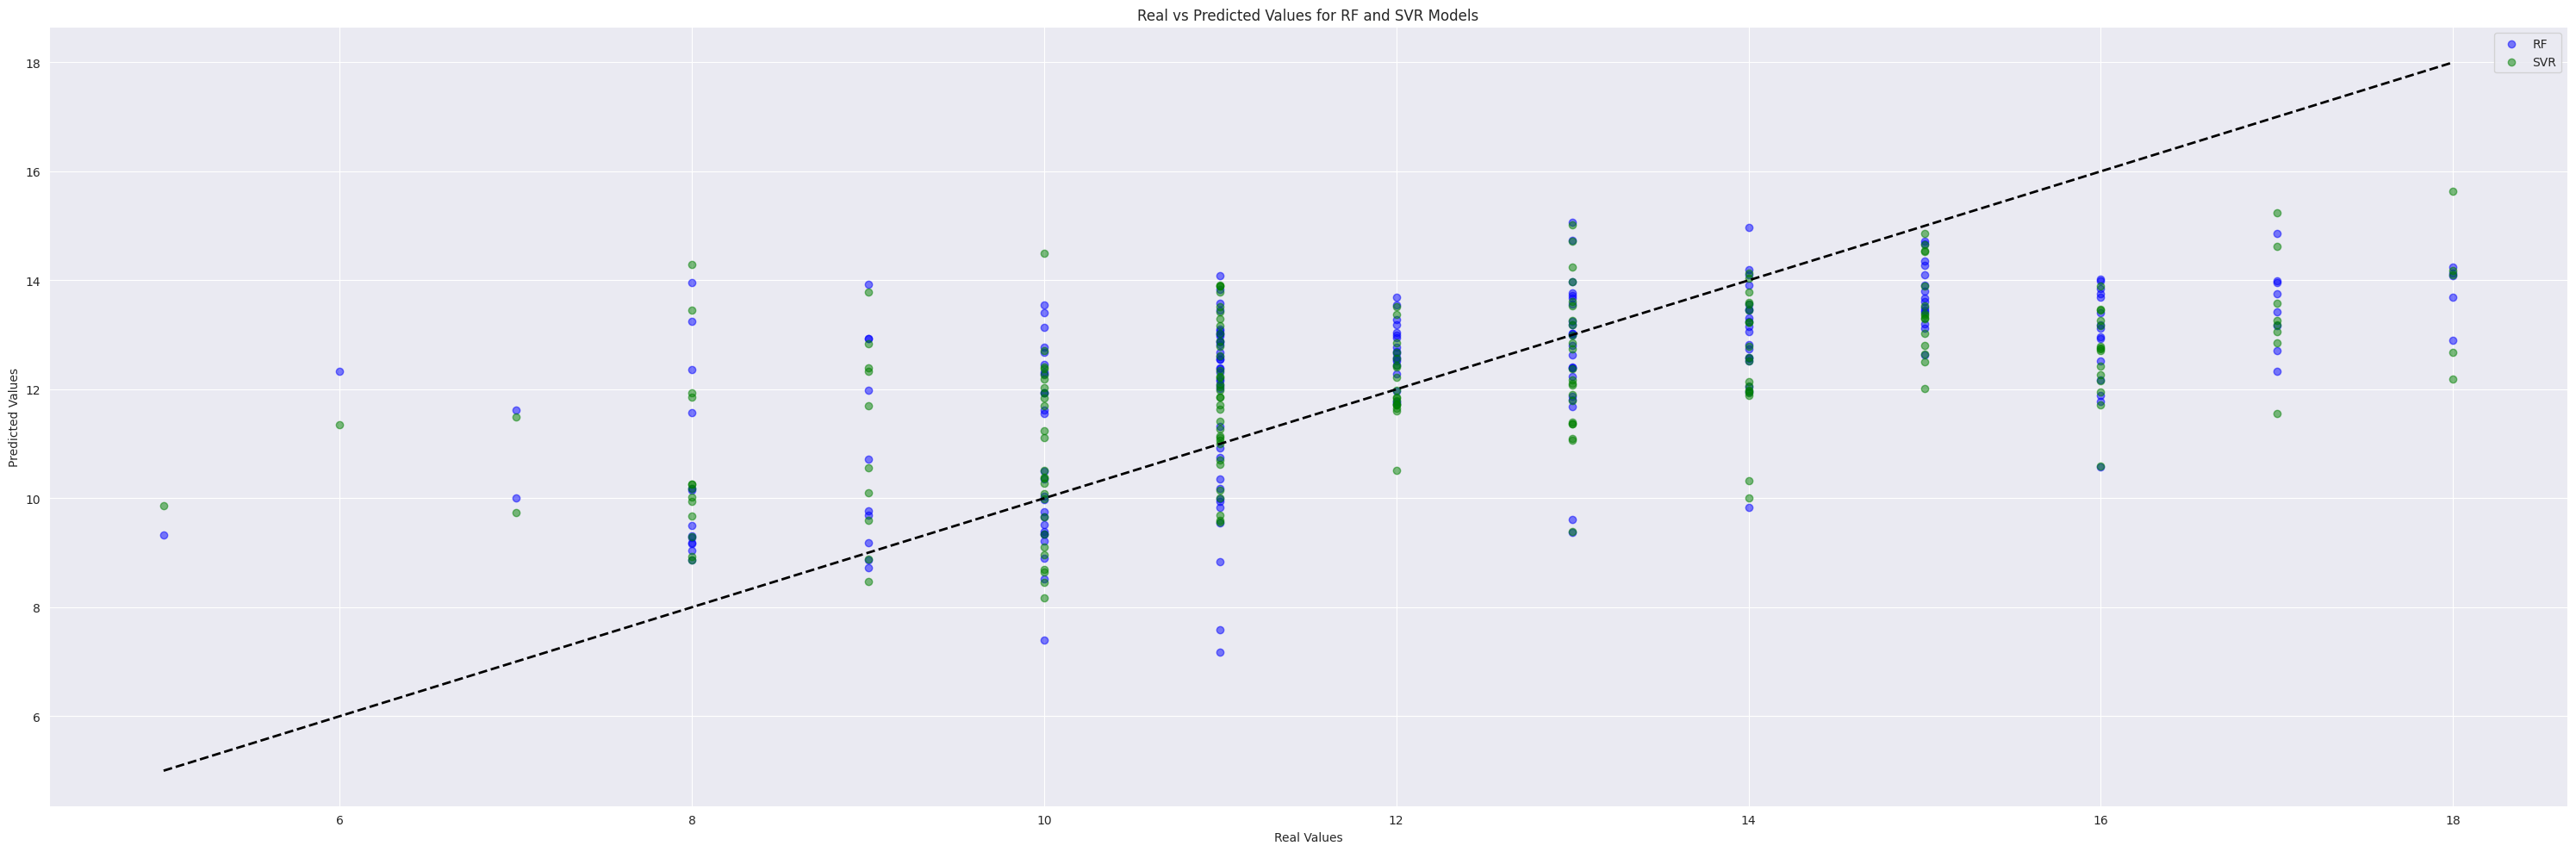

In [30]:
# predictions
rf_predictions = models[0].predict(X_test)  # RF is the first model in the list
svr_predictions = models[3].predict(X_test)  # SVR is the last model in the list

# create a figure with specified size
plt.figure(figsize=(30, 10))

# plotting random forest
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.5, label='RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect predictions line

# plotting support vector regressor
plt.scatter(y_test, svr_predictions, color='green', alpha=0.5, label='SVR')

# plot labels, title, legend and grid
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values for RF and SVR Models')
plt.legend()
plt.grid(True)

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

Both models perform quite well to predict grades near the mean value. Altough they tend to overestimate low grades and underestimate higher grades.

---

We saw before that RF is slightly better than SVR. In order to choose the best one we now proceed to plot errors distribution for RF and SVR.

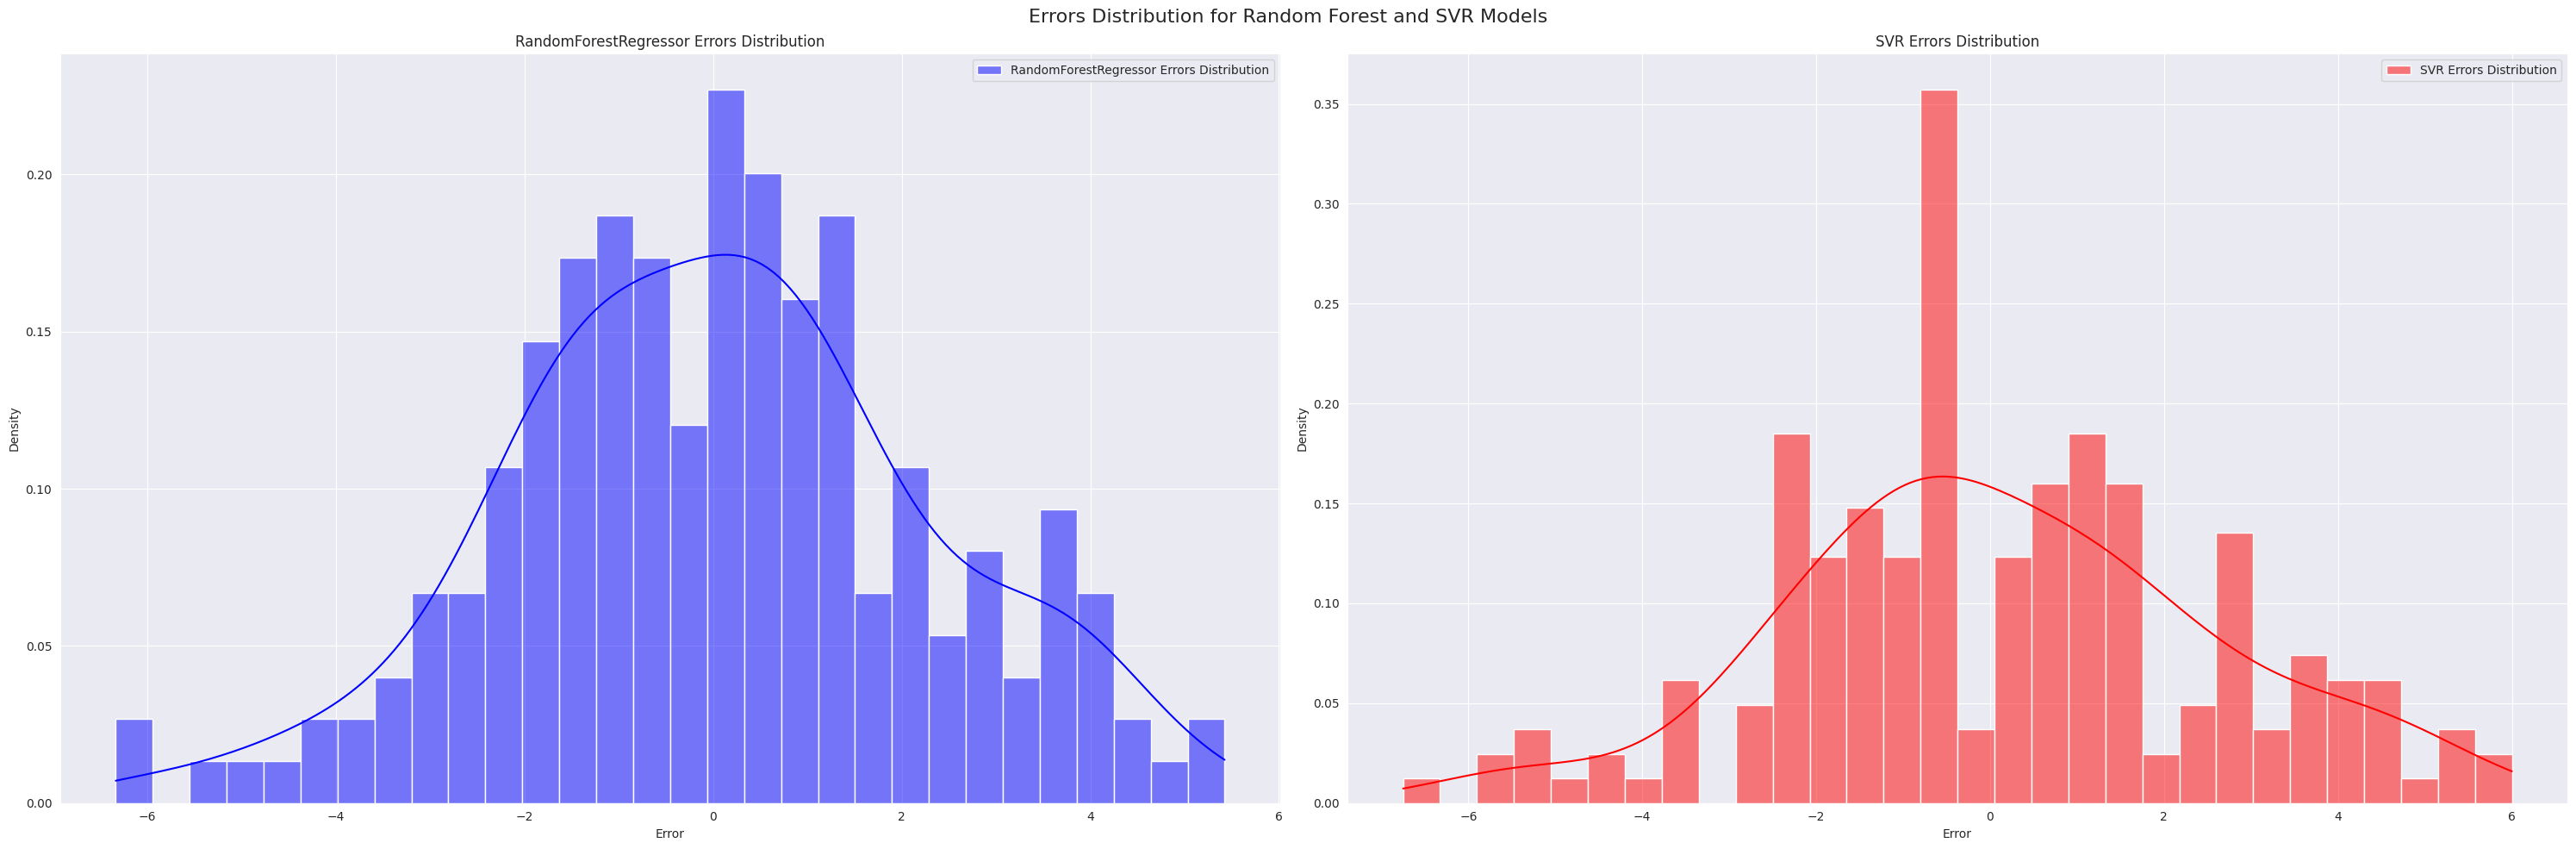

In [31]:
# define colors and model names
colors = ['blue', 'red']
models_list = ['RandomForestRegressor', 'SVR']

# compute errors for each model
dist_errors = {}

for model, model_name in zip(models, models_list):
    dist_errors[model_name] = y_test - model.predict(X_test)

# plotting error distributions for RF and SVR
plt.figure(figsize=(30, 10))

for i, model_name in enumerate(models_list):
    plt.subplot(1, 2, i+1)
    sns.histplot(dist_errors[model_name], bins=30, kde=True, color=colors[i],
                 label=f'{model_name} Errors Distribution', stat='density')
    plt.title(f'{model_name} Errors Distribution')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()

plt.suptitle('Errors Distribution for Random Forest and SVR Models', fontsize=16)

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

The Random Forest appears to be the better model for our goal compared to SVR. It has a lower mean error, a more balanced distribution of errors (with a lower median), and shows less extreme variation in errors, suggesting greater stability in predictions.

---
Last let's see which are the most important features of RF for the prediction of G3.

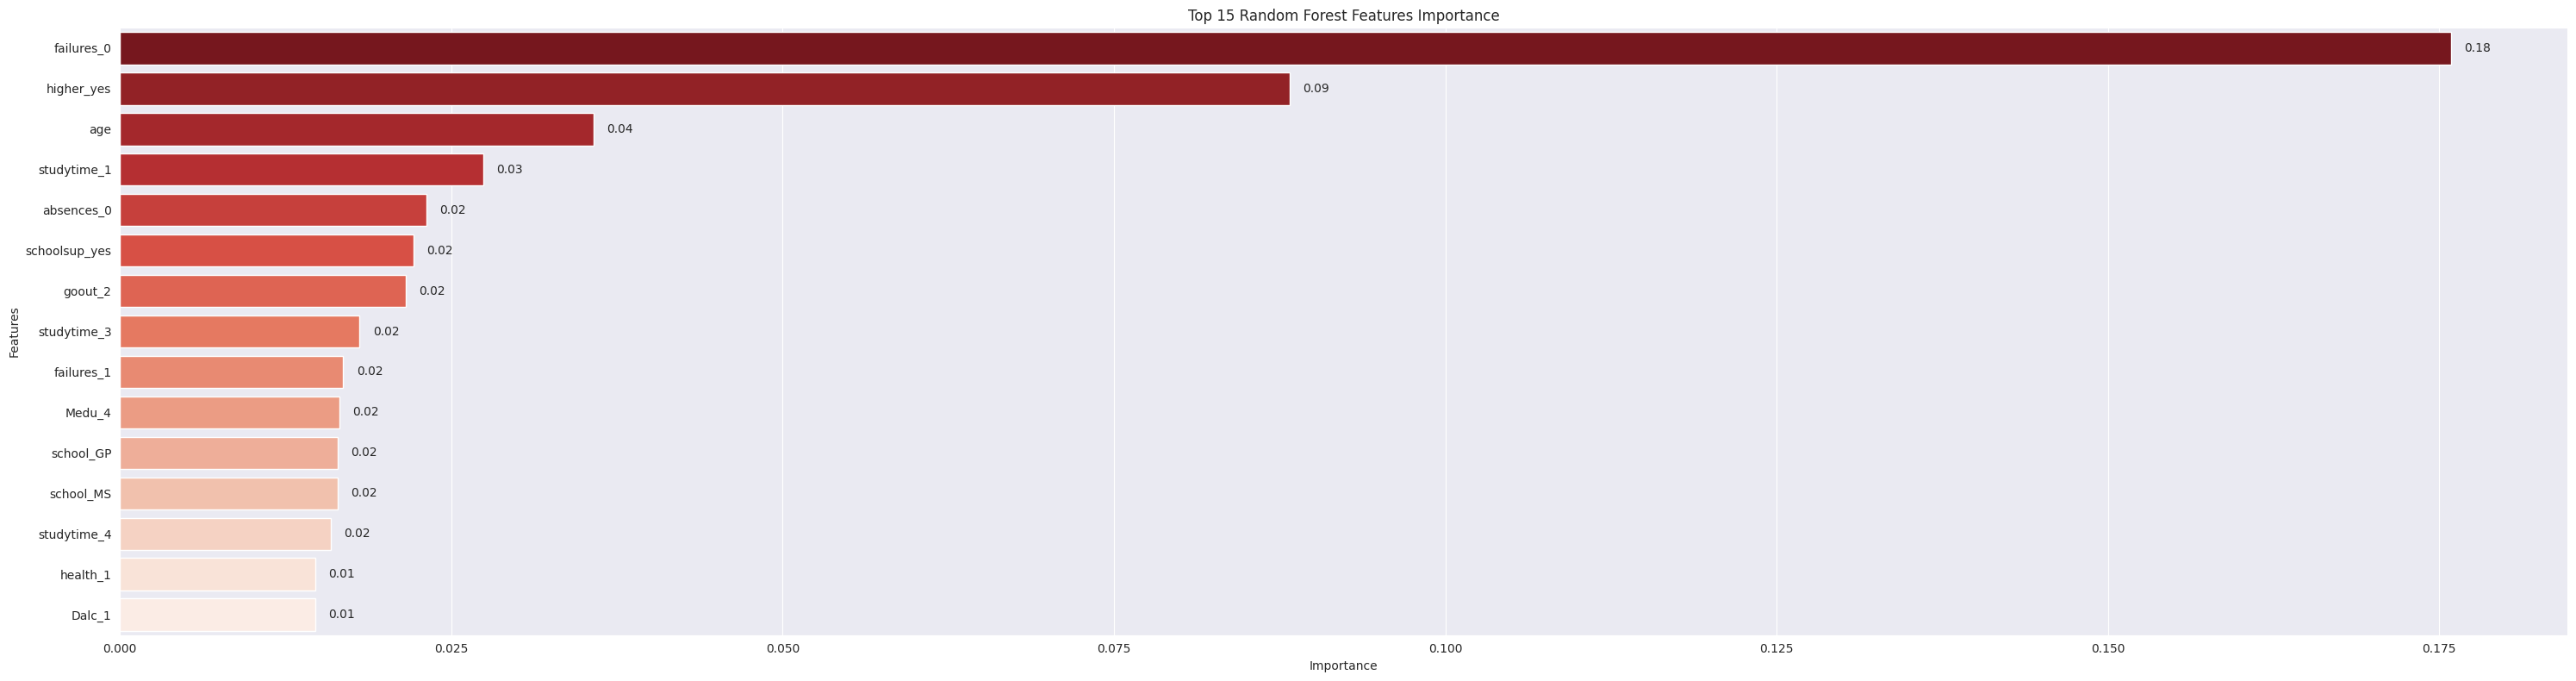

In [32]:
# feature names
feature_names = pd.get_dummies(df.drop(['G3'], axis=1)).columns

# feature importances from the RF
rf_feature_importances = models[0].feature_importances_

# Pandas Series for better indexing and sorting
importance = pd.Series(rf_feature_importances, index=feature_names).sort_values(ascending=False).head(15)

# plotting feature importances
plt.figure(figsize=(30, 8))
sns.barplot(x=importance.values, y=importance.index, palette='Reds_r', hue=importance.index, dodge=False, legend=False)
plt.title('Top 15 Random Forest Features Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# print the values on the bars
for i, v in enumerate(importance.values):
    plt.text(v + 0.001, i, f'{v:.2f}', va='center', fontsize=10)

# adjust layout to prevent overlapping
plt.tight_layout()

# display the plot
plt.show()

The most important features for the Random Forest model are mainly related to:

- The number of past failures (failures_0 and failures_1), which is the most significant
- Educational aspirations (higher_yes)
- Age of the students (age)
- Weekly study time (studytime) and extra educational support (schoolsup).
- Presence and type of absences (absences)
- Personal characteristics such as going out with friends (goout), workday alcohol consumption (Dalc), weekend alcohol consumption (Walc), and health status (health)

# Conclusion

Based on the results of the analyzed models, the Random Forest stands out as the most effective model for predicting students' grades. It has the highest coefficient of determination ($R^2$ Test) among all tested models, indicating a greater ability to explain variance in the test data compared to the others. Additionally, it has the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) scores, indicating better prediction accuracy compared to the other models.

Despite showing a difference between $R^2$ Train and $R^2$ Test, suggesting a potential overfitting issue, its generalization ability is still superior compared to the other models, as confirmed by the lower error scores in the test data.